# Data Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
# Check for missing values, values with 0 mean they have no missing values
missing_values = data.isnull().sum()
missing_values

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)

# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Display the first few rows of the refined encoded dataset
data_encoded.head()

Gender   Age  Height  Weight  family_history_with_overweight   FAVC  FCVC  \
0   False  21.0    1.62    64.0                            True  False   2.0   
1   False  21.0    1.52    56.0                            True  False   3.0   
2    True  23.0    1.80    77.0                            True  False   2.0   
3    True  27.0    1.80    87.0                           False  False   3.0   
4    True  22.0    1.78    89.8                           False  False   2.0   

   NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  3.0  False   2.0  ...        False             False   
1  3.0   True   3.0  ...        False             False   
2  3.0  False   2.0  ...        False             False   
3  3.0  False   2.0  ...        False             False   
4  1.0  False   2.0  ...        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      True   
1                          True           False                      True   
2                          True           False                      True   
3                         False            True                     False   
4                          True           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  

[5 rows x 29 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to normalize
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows of the normalized dataset
data_encoded.head()

Gender       Age    Height    Weight  family_history_with_overweight  \
0   False  0.148936  0.320755  0.186567                            True   
1   False  0.148936  0.132075  0.126866                            True   
2    True  0.191489  0.660377  0.283582                            True   
3    True  0.276596  0.660377  0.358209                           False   
4    True  0.170213  0.622642  0.379104                           False   

    FAVC  FCVC       NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  False   0.5  0.666667  False   0.5  ...        False             False   
1  False   1.0  0.666667   True   1.0  ...        False             False   
2  False   0.5  0.666667  False   0.5  ...        False             False   
3  False   1.0  0.666667  False   0.5  ...        False             False   
4  False   0.5  0.000000  False   0.5  ...        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      True   
1                          True           False                      True   
2                          True           False                      True   
3                         False            True                     False   
4                          True           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  

[5 rows x 29 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y

0             NObeyesdad_Normal_Weight
1             NObeyesdad_Normal_Weight
2             NObeyesdad_Normal_Weight
3        NObeyesdad_Overweight_Level_I
4       NObeyesdad_Overweight_Level_II
                     ...              
2106       NObeyesdad_Obesity_Type_III
2107       NObeyesdad_Obesity_Type_III
2108       NObeyesdad_Obesity_Type_III
2109       NObeyesdad_Obesity_Type_III
2110       NObeyesdad_Obesity_Type_III
Length: 2111, dtype: object

# Decision Tree

In [ ]:

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.96      0.98      0.97       118
     NObeyesdad_Obesity_Type_I       0.95      0.94      0.94        78
    NObeyesdad_Obesity_Type_II       0.93      0.95      0.94        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.91      0.91      0.91        56
NObeyesdad_Overweight_Level_II       0.98      0.92      0.95        50

                      accuracy                           0.96       423
                     macro avg       0.95      0.95      0.95       423
                  weighted avg       0.96      0.96      0.96       423

Accuracy: 0.9550827423167849


{'NObeyesdad_Normal_Weight': {'precision': 0.9586776859504132,
  'recall': 0.9830508474576272,
  'f1-score': 0.9707112970711298,
  'support': 118},
 'NObeyesdad_Obesity_Type_I': {'precision': 0.948051948051948,
  'recall': 0.9358974358974359,
  'f1-score': 0.9419354838709677,
  'support': 78},
 'NObeyesdad_Obesity_Type_II': {'precision': 0.9322033898305084,
  'recall': 0.9482758620689655,
  'f1-score': 0.94017094017094,
  'support': 58},
 'NObeyesdad_Obesity_Type_III': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 63},
 'NObeyesdad_Overweight_Level_I': {'precision': 0.9107142857142857,
  'recall': 0.9107142857142857,
  'f1-score': 0.9107142857142857,
  'support': 56},
 'NObeyesdad_Overweight_Level_II': {'precision': 0.9787234042553191,
  'recall': 0.92,
  'f1-score': 0.9484536082474226,
  'support': 50},
 'accuracy': 0.9550827423167849,
 'macro avg': {'precision': 0.9547284523004125,
  'recall': 0.949656405189719,
  'f1-score': 0.9519976025124577,
  'support': 423

In [ ]:
import numpy as np
# Check the prediction for one input


single_instance = np.array(X_train.iloc[0]).reshape(1, -1)
print(np.array(X_train.iloc[0]))
print(np.array(y_train[0]))
# Predict the class for the single instance
single_prediction = dt_classifier.predict(single_instance)

print("Predicted class for the single instance:", single_prediction[0])

[False 0.14893617021276595 0.3396226415094339 0.15671641791044777 True
 True 1.0 0.6666666666666667 True 0.5 False 0.6666666666666666 0.0 False
 False False False True False False False True False]
NObeyesdad_Normal_Weight
Predicted class for the single instance: NObeyesdad_Normal_Weight


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


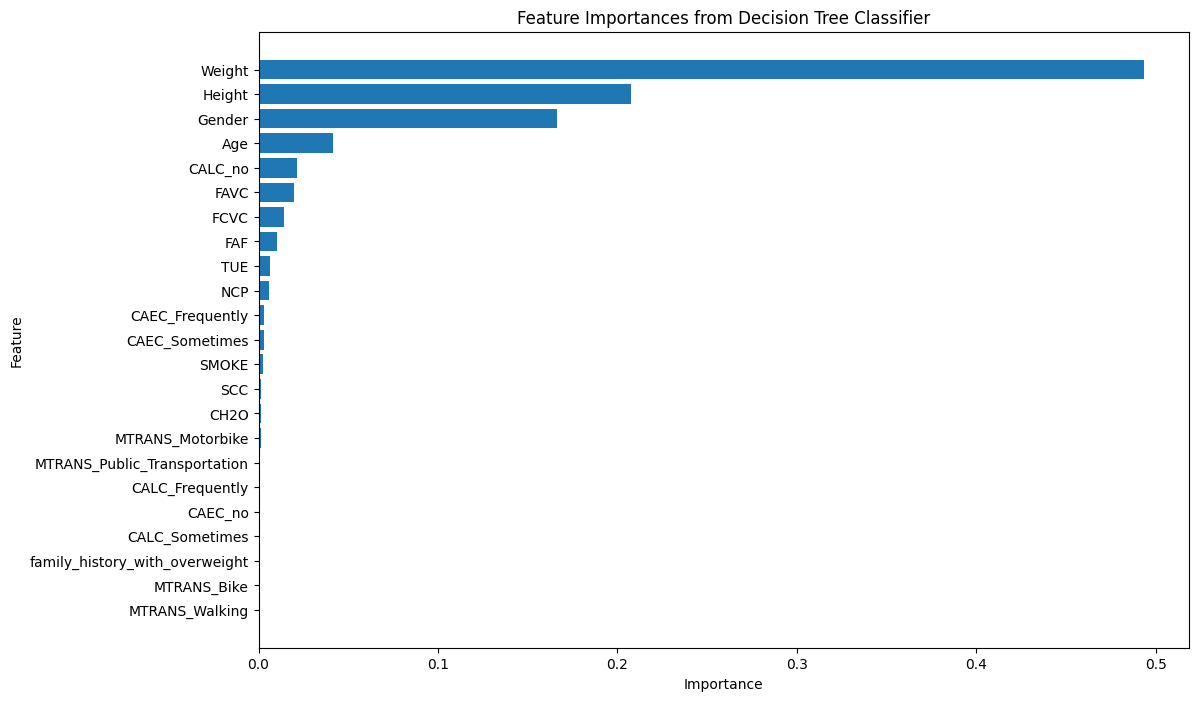

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

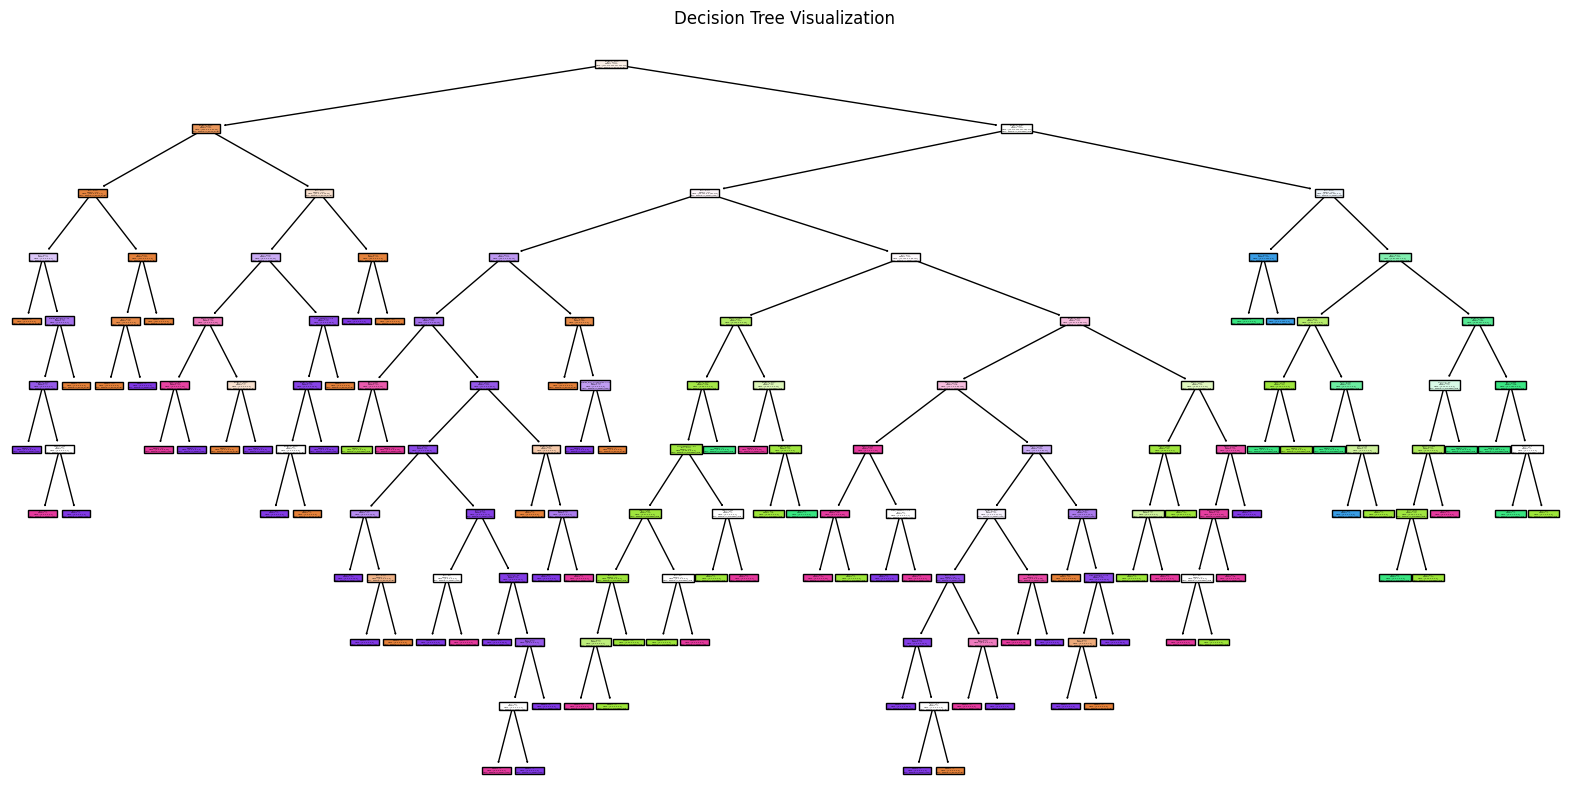

In [ ]:
# Plot the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

The visualization of the Decision Tree provides an overview of the decision-making process, highlighting the features and thresholds used at each split. This visual interpretation helps understand how the model arrives at its predictions

#Pruning the Decision Tree
**What is Pruning?**

Pruning in the context of Decision Trees is a technique used to reduce the size of the tree and eliminate parts of the tree that do not provide additional power in predicting target variables. There are two primary types of pruning

**Why Prune a Decision Tree?**
1. To avoid overfitting
2. Improve Generalization
3. Enhance Interpretability:A simpler, pruned tree is easier to interpret and visualize
4. Reduce Complexity

By implementing pruning, we observe a simpler Decision Tree that is easier to interpret, even if it might result in a slight decrease in performance metrics like accuracy

In [31]:
# Initialize a pruned Decision Tree Classifier with a maximum depth
pruned_dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the pruned model
pruned_dt_classifier.fit(X_train, y_train)

# Make predictions with the pruned model
y_pred_pruned = pruned_dt_classifier.predict(X_test)

# Evaluate the pruned model
classification_report_pruned = classification_report(y_test, y_pred_pruned, output_dict=True)
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
classification_report_pruned

Accuracy: 0.8014184397163121


{'0': {'precision': 0.5142857142857142,
  'recall': 0.5373134328358209,
  'f1-score': 0.5255474452554744,
  'support': 67},
 '1': {'precision': 0.8285714285714286,
  'recall': 1.0,
  'f1-score': 0.90625,
  'support': 58},
 '2': {'precision': 0.8709677419354839,
  'recall': 0.8852459016393442,
  'f1-score': 0.8780487804878049,
  'support': 244},
 '3': {'precision': 0.8285714285714286,
  'recall': 0.5370370370370371,
  'f1-score': 0.651685393258427,
  'support': 54},
 'accuracy': 0.8014184397163121,
 'macro avg': {'precision': 0.7605990783410139,
  'recall': 0.7398990928780506,
  'f1-score': 0.7403829047504265,
  'support': 423},
 'weighted avg': {'precision': 0.8032465056487019,
  'recall': 0.8014184397163121,
  'f1-score': 0.7971846158560194,
  'support': 423}}

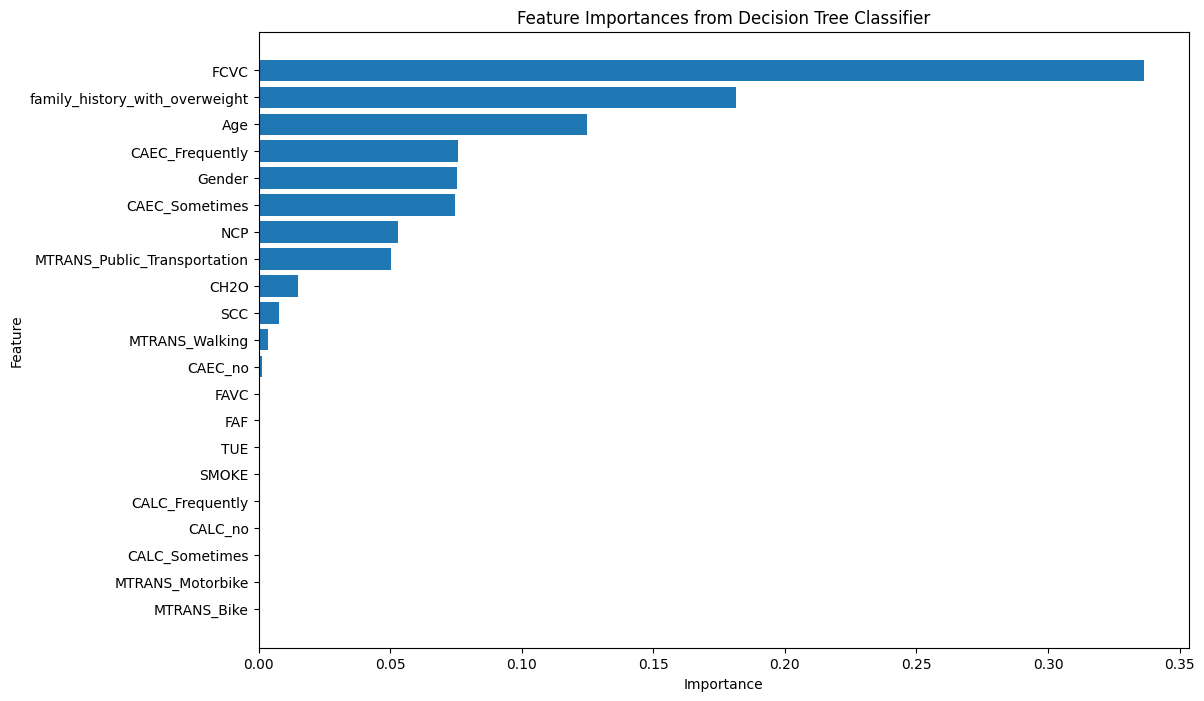

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = pruned_dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

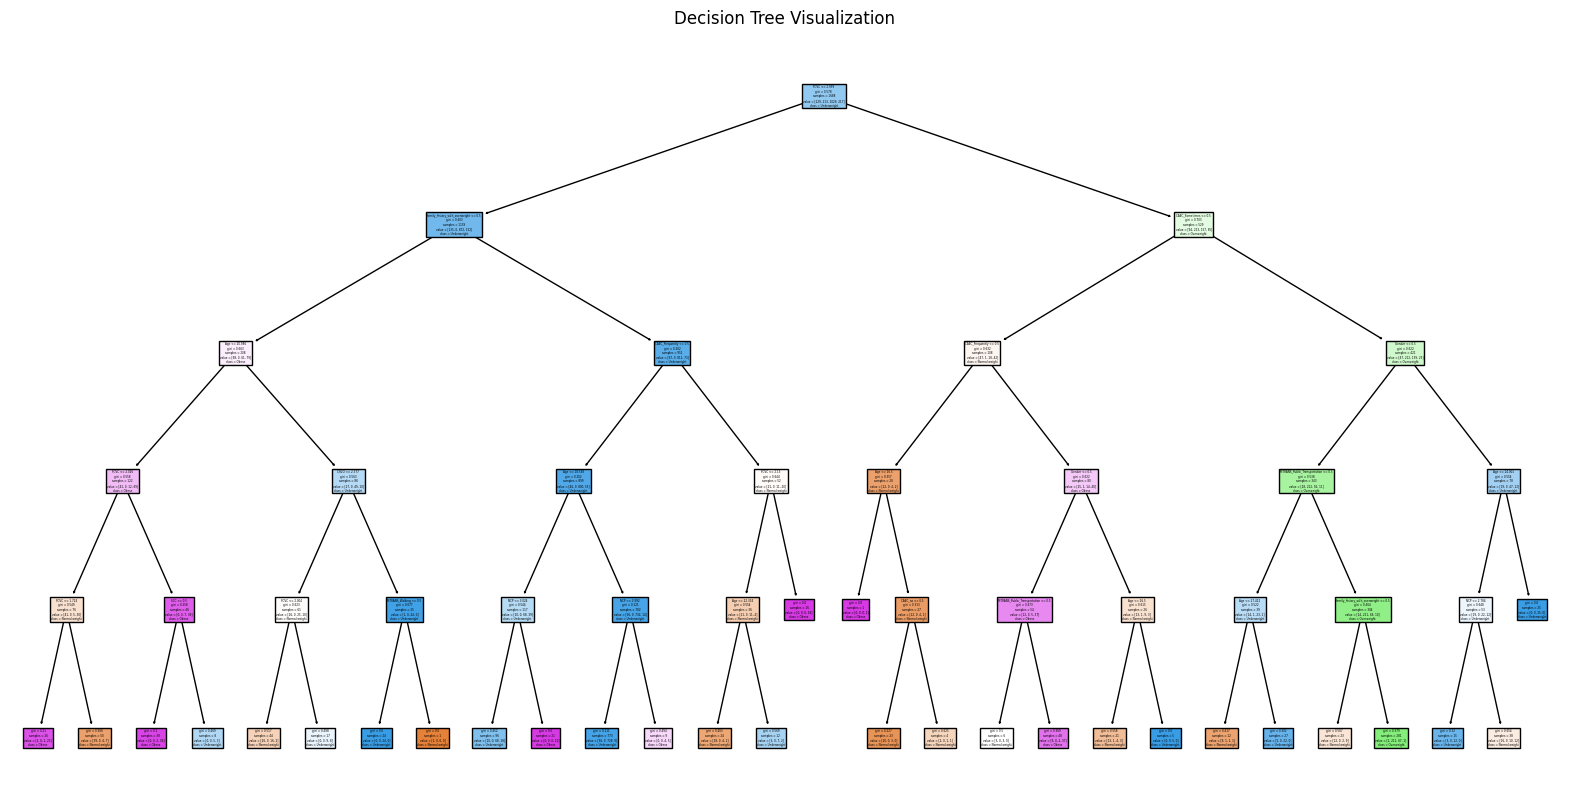

In [33]:
# Plot the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

# Random forest

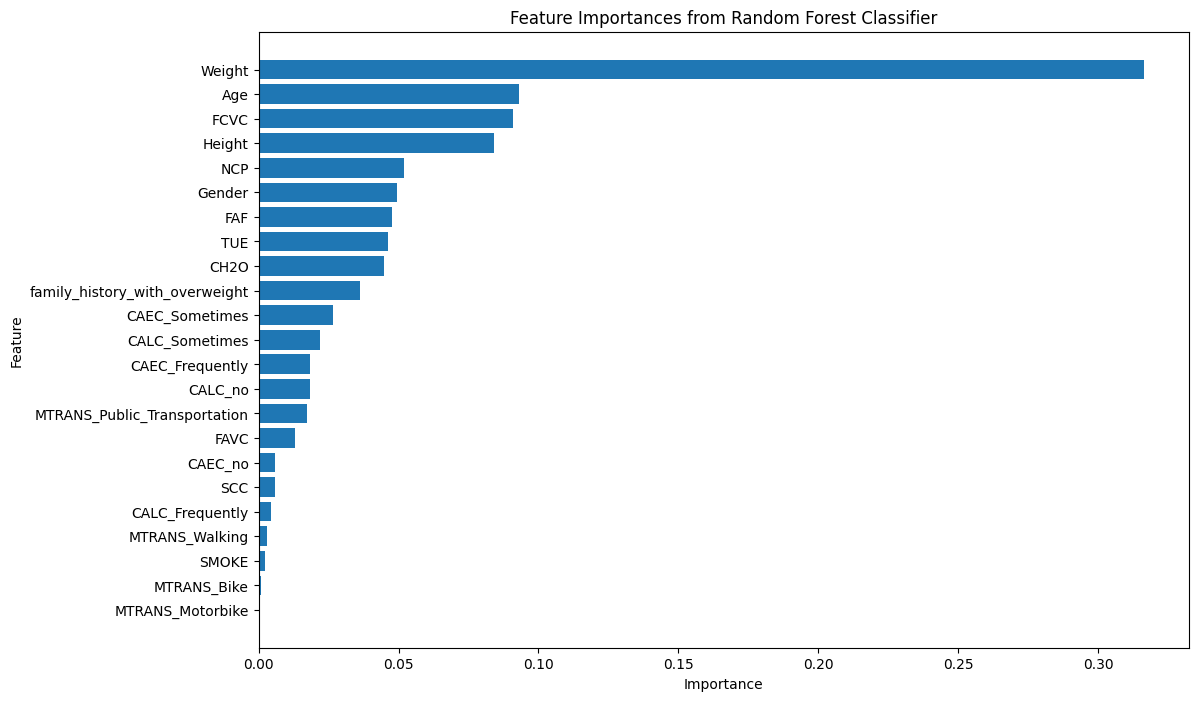

Accuracy: 0.9527186761229315


{'NObeyesdad_Normal_Weight': {'precision': 0.95,
  'recall': 0.9661016949152542,
  'f1-score': 0.957983193277311,
  'support': 118},
 'NObeyesdad_Obesity_Type_I': {'precision': 0.9864864864864865,
  'recall': 0.9358974358974359,
  'f1-score': 0.9605263157894737,
  'support': 78},
 'NObeyesdad_Obesity_Type_II': {'precision': 0.9661016949152542,
  'recall': 0.9827586206896551,
  'f1-score': 0.9743589743589743,
  'support': 58},
 'NObeyesdad_Obesity_Type_III': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 63},
 'NObeyesdad_Overweight_Level_I': {'precision': 0.847457627118644,
  'recall': 0.8928571428571429,
  'f1-score': 0.8695652173913044,
  'support': 56},
 'NObeyesdad_Overweight_Level_II': {'precision': 0.9583333333333334,
  'recall': 0.92,
  'f1-score': 0.9387755102040817,
  'support': 50},
 'accuracy': 0.9527186761229315,
 'macro avg': {'precision': 0.9513965236422863,
  'recall': 0.9496024823932481,
  'f1-score': 0.9502015351701908,
  'support': 423},
 'weighte

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=46, random_state=0, max_depth = 15, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Extract feature importances
rf_feature_importances = rf_classifier.feature_importances_
#
# Create a DataFrame for visualization
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the Random Forest
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Make predictions with the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_report_rf

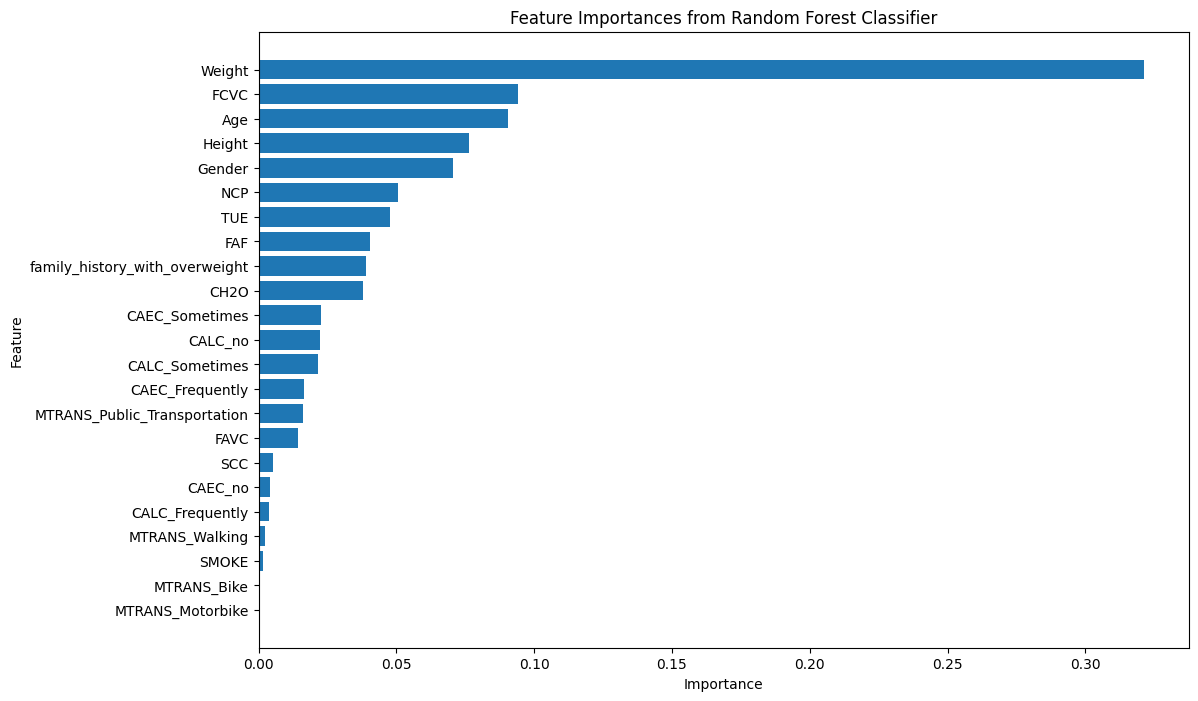

Accuracy: 0.9481132075471698


{'NObeyesdad_Normal_Weight': {'precision': 0.9027777777777778,
  'recall': 0.9848484848484849,
  'f1-score': 0.9420289855072465,
  'support': 66},
 'NObeyesdad_Obesity_Type_I': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 38},
 'NObeyesdad_Obesity_Type_II': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 35},
 'NObeyesdad_Obesity_Type_III': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 30},
 'NObeyesdad_Overweight_Level_I': {'precision': 0.8421052631578947,
  'recall': 0.7272727272727273,
  'f1-score': 0.7804878048780488,
  'support': 22},
 'NObeyesdad_Overweight_Level_II': {'precision': 0.9444444444444444,
  'recall': 0.8095238095238095,
  'f1-score': 0.8717948717948718,
  'support': 21},
 'accuracy': 0.9481132075471698,
 'macro avg': {'precision': 0.9482212475633528,
  'recall': 0.9202741702741702,
  'f1-score': 0.9323852770300279,
  'support': 212},
 'weighted avg': {'precision': 0.9478442568685865,
  'recall': 0.94811

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=46, random_state=0, max_depth = 15, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Extract feature importances
rf_feature_importances = rf_classifier.feature_importances_
#
# Create a DataFrame for visualization
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the Random Forest
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Make predictions with the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_report_rf

# Gradient Boosting Model (LightGBM)

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 21
[LightGBM] [Info] Start training from score -1.342255
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

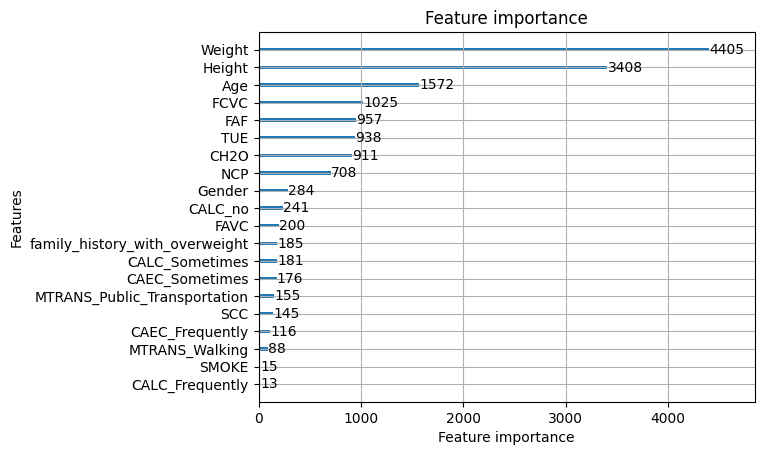

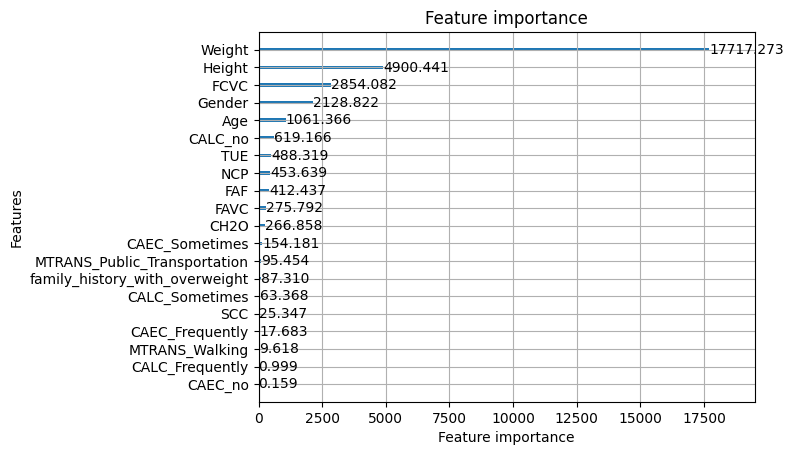

In [ ]:
# Plot feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:
#Definition: Split importance measures the number of times a feature is used in the decision splits across all trees in the model.
#Interpretation: A higher split importance indicates that the feature is frequently used to make decisions, suggesting it plays a significant role in the model.

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.3 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 21
[LightGBM] [Info] Start training from score -1.342255
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

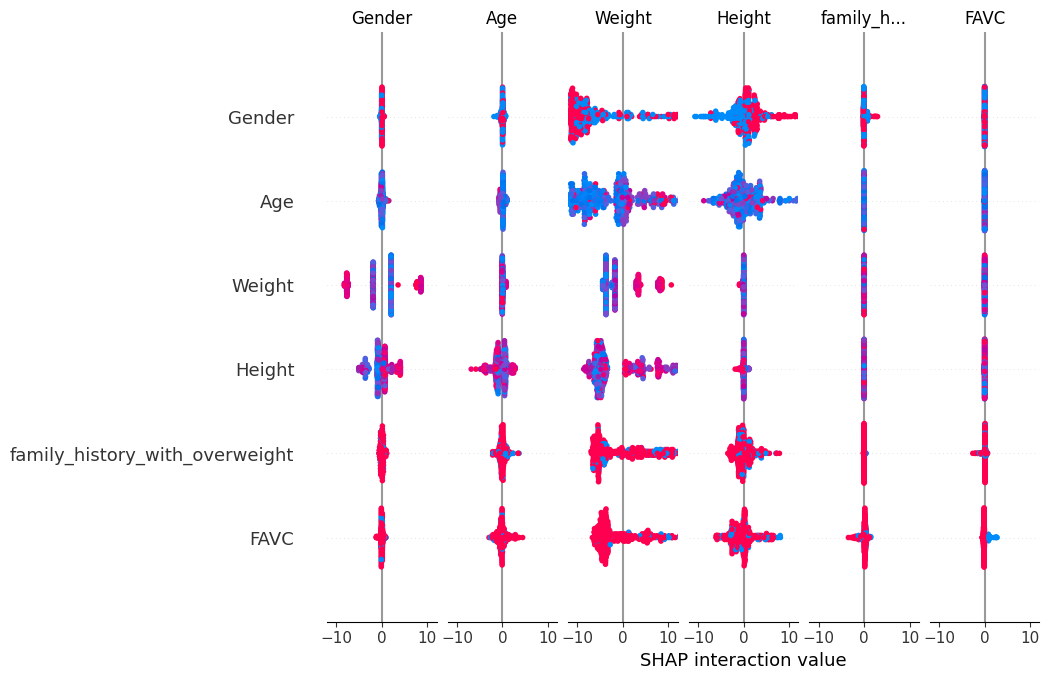

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
import shap
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

# Initialize SHAP explainer
explainer = shap.Explainer(lgb_classifier)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP value for a single prediction
shap.initjs()

# If the problem is binary classification or single-class
if isinstance(shap_values, list) and len(shap_values) > 1:
    shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0], feature_names=X.columns)
else:
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], feature_names=X.columns)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2066
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 21
[LightGBM] [Info] Start training from score -1.342255
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

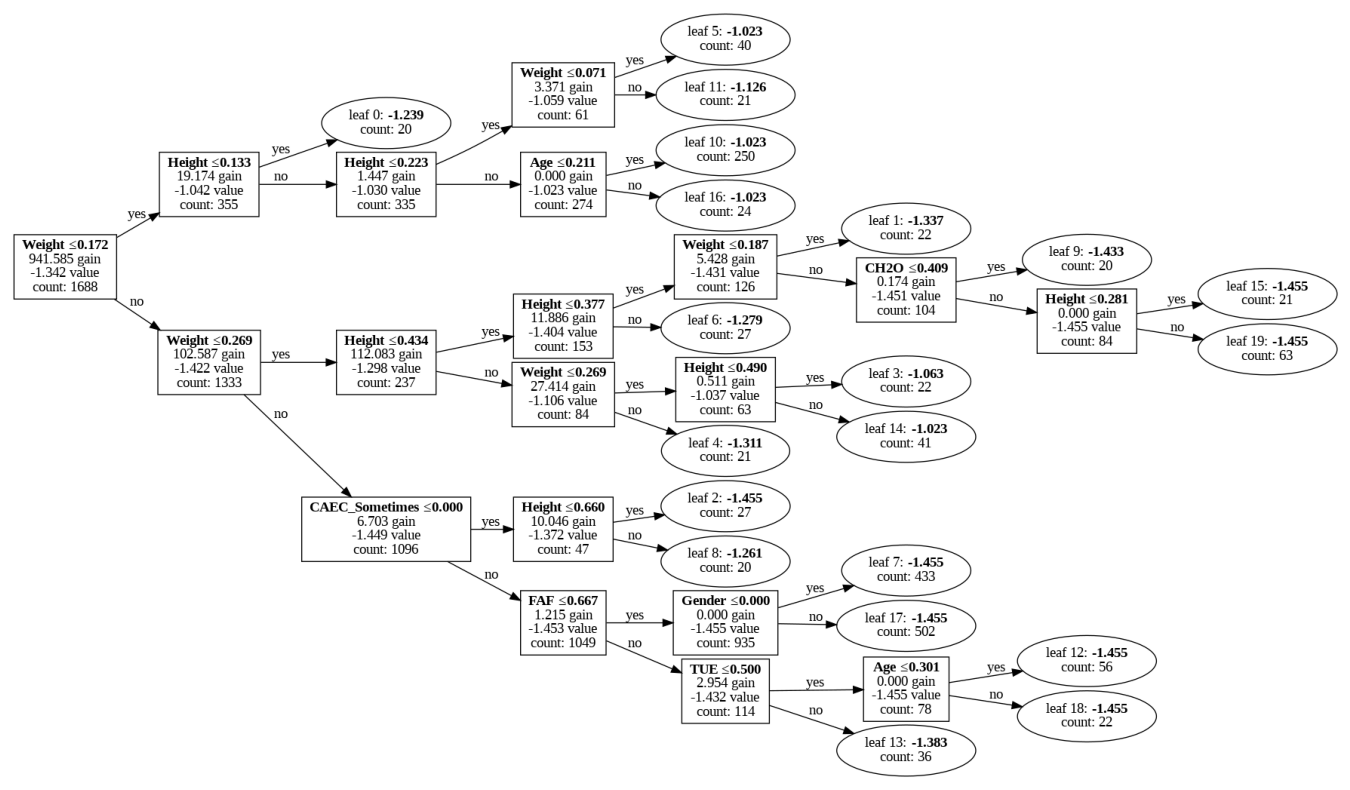

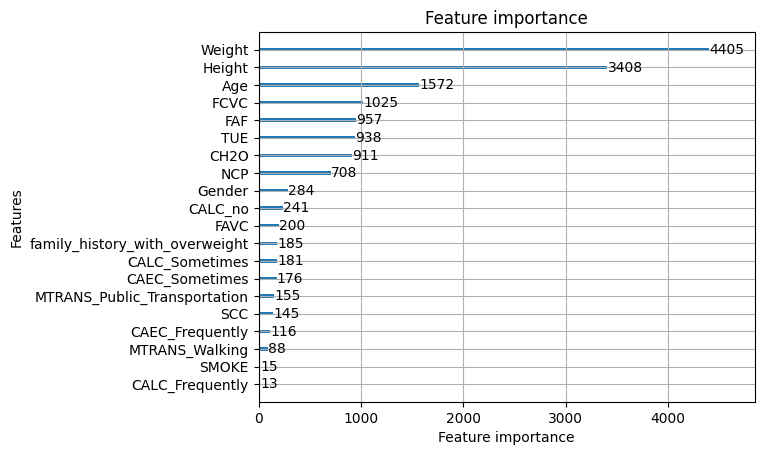

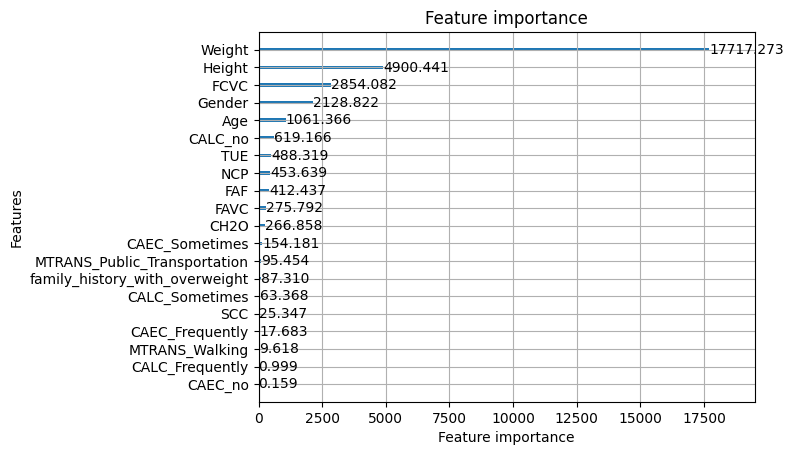

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

# Plot the first tree
fig, ax = plt.subplots(figsize=(20, 10))
lgb.plot_tree(lgb_classifier, tree_index=0, ax=ax, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

# Plot the feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:

# Get the number of trees
num_trees = lgb_classifier.booster_.num_trees()
print(f"Number of trees in the model: {num_trees}")

Number of trees in the model: 600


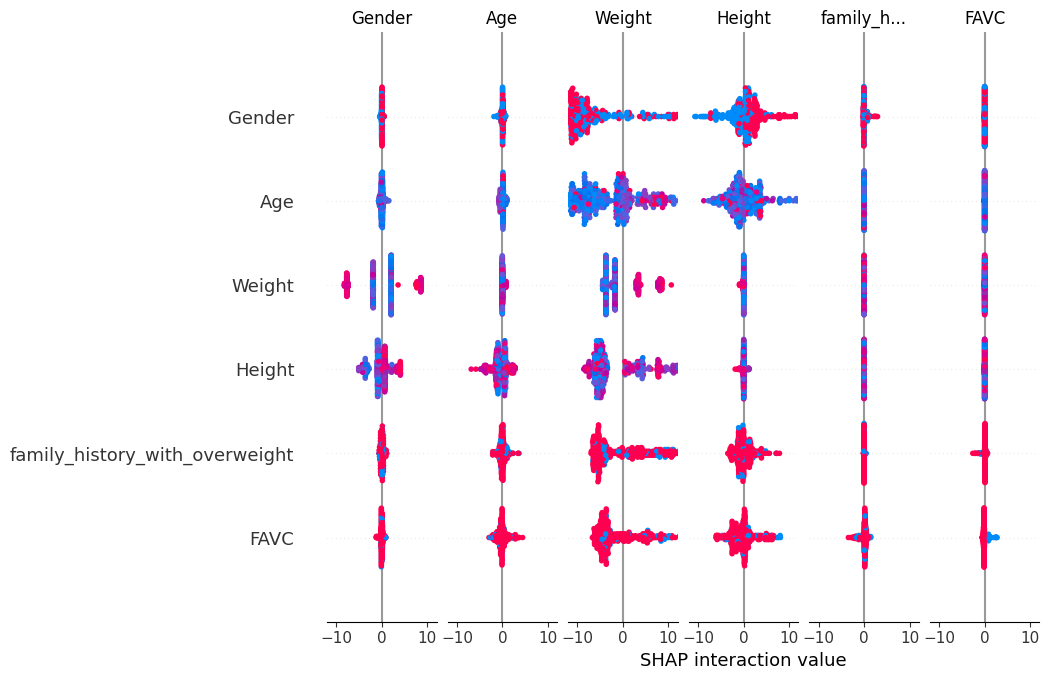

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(lgb_classifier)

# Calculate SHAP values for the entire dataset
shap_values = explainer(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

For interpretability, you might want to focus on trees with high importance. While LightGBM doesn’t directly rank trees by importance, you can look at the overall importance of features used in specific trees.
Tools like SHAP can help you understand the overall importance and contribution of features across all trees, not just individual ones.

# RuleFit

In [ ]:
!pip install git+https://github.com/christophM/rulefit.git

  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-req-build-f90g3c8l
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-req-build-f90g3c8l
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done
  Created wheel for RuleFit: filename=RuleFit-0.3-py3-none-any.whl size=8083 sha256=82a2e339661dddd1a07e05ca68e0156fcd7fec2b619bb99e4be30ab622128142
  Stored in directory: /tmp/pip-ephem-wheel-cache-gvxqv6la/wheels/d6/cf/9c/8838db2e27ac18c3002e2e2fcaa90b2210f681e60ad529e613
Successfully built RuleFit


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from rulefit import RuleFit
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from rulefit import RuleFit
import numpy as np

# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize RuleFit with explicit max_iter for LassoCV
rulefit = RuleFit(max_iter=1000)

# Train RuleFit on the dataset
rulefit.fit(X_train.values, y_train)

# Make predictions with the RuleFit model
y_pred_rulefit = rulefit.predict(X_test.values)

# Round and clip predictions to ensure valid class labels
y_pred_rulefit_int = np.round(y_pred_rulefit).astype(int)
y_pred_rulefit_int = np.clip(y_pred_rulefit_int, 0, len(label_encoder.classes_) - 1)

# Evaluate the RuleFit model
print("RuleFit Classification Report:\n", classification_report(y_test, y_pred_rulefit_int))
print("RuleFit Accuracy:", accuracy_score(y_test, y_pred_rulefit_int))

# Decode the numeric labels back to original labels if needed for interpretation
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_rulefit_decoded = label_encoder.inverse_transform(y_pred_rulefit_int)
print("Decoded RuleFit Classification Report:\n", classification_report(y_test_decoded, y_pred_rulefit_decoded))
print("Decoded RuleFit Accuracy:", accuracy_score(y_test_decoded, y_pred_rulefit_decoded))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.586e-01, tolerance: 3.542e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.936e-01, tolerance: 3.542e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.785e-01, tolerance: 3.542e-01

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_des

RuleFit Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       118
           1       0.74      0.81      0.77        78
           2       0.78      0.97      0.86        58
           3       0.75      1.00      0.86        63
           4       0.70      0.62      0.66        56
           5       0.84      0.62      0.71        50

    accuracy                           0.80       423
   macro avg       0.79      0.80      0.79       423
weighted avg       0.81      0.80      0.80       423

RuleFit Accuracy: 0.8014184397163121
Decoded RuleFit Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.96      0.77      0.85       118
     NObeyesdad_Obesity_Type_I       0.74      0.81      0.77        78
    NObeyesdad_Obesity_Type_II       0.78      0.97      0.86        58
   NObeyesdad_Obesity_Type_III       0.75      1.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+00, tolerance: 5.343e-01



In [ ]:
print(dir(rulefit))

['Cs', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'coef_', 'cv', 'exp_rand_tree_size', 'feature_names', 'fit', 'fit_transform', 'friedscale', 'get_params', 'intercept_', 'lin_standardise', 'lin_trim_quantile', 'lscv', 'max_iter', 'max_rules', 'mean', 'memory_par', 'model_type', 'n_jobs', 'predict', 'predict_proba', 'random_state', 'rfmode', 'rule_ensemble', 'sample_fract', 'sample_fract_', 'set_output', 'set_params', 'stddev', 'tol', 'transfor

In [ ]:
rules = rulefit.rule_ensemble

In [ ]:
rules = rulefit.rule_ensemble.rules
rules_df = pd.DataFrame([(rule.__str__(), rule.support, rule.prediction_value) for rule in rules], columns=['rule', 'support', 'prediction_value'])

# Filter out rules with zero prediction values (if necessary)
rules_df = rules_df[rules_df.prediction_value != 0].sort_values(by='prediction_value', ascending=False)

# Display the top rules
print(len(rules_df))

1785


In [ ]:
rules_df.to_csv('rulefit_rules.csv', index=False)

# EBM Model


In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 92.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00


In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Make predictions with the EBM model
y_pred_ebm = ebm.predict(X_test)

# Evaluate the EBM model
print("EBM Classification Report:\n", classification_report(y_test, y_pred_ebm))
print("EBM Accuracy:", accuracy_score(y_test, y_pred_ebm))

EBM Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.97      0.97      0.97       118
     NObeyesdad_Obesity_Type_I       0.96      0.96      0.96        78
    NObeyesdad_Obesity_Type_II       0.97      0.98      0.97        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.89      0.84      0.86        56
NObeyesdad_Overweight_Level_II       0.88      0.92      0.90        50

                      accuracy                           0.95       423
                     macro avg       0.94      0.94      0.94       423
                  weighted avg       0.95      0.95      0.95       423

EBM Accuracy: 0.950354609929078


/usr/local/lib/python3.10/dist-packages/interpret/glassbox/_ebm/_ebm.py:995: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.



In [ ]:
# Extract global feature importances from the EBM model
global_explanation = ebm.explain_global()
importance = []
print("Global Feature Importances:")
for i, feature in enumerate(global_explanation.data()['names']):
    print(f"{feature}: {global_explanation.data()['scores'][i]}")
    importance.append(global_explanation.data()['scores'][i])
#The scores show the magnitude of each feature’s contribution to the predictions made by the model.
#Higher scores indicate that the feature has a greater impact on the predictions.
# e.g.  Weight has the highest importance score (9.51576358905608)

Global Feature Importances:
Gender: 0.7686893726000872
Age: 0.5669761585040197
Height: 3.8736728209732307
Weight: 9.51576358905608
family_history_with_overweight: 0.41602019826765996
FAVC: 0.12026884727198969
FCVC: 0.7548012094426461
NCP: 0.4932033009149099
SMOKE: 0.024838477651541856
CH2O: 0.2858344794076297
SCC: 0.09298661099622545
FAF: 0.35211504029060914
TUE: 0.3945286452051266
CAEC_Frequently: 0.22405908733601115
CAEC_Sometimes: 0.17366733632705042
CAEC_no: 0.056121772222241295
CALC_Frequently: 0.05197489015103629
CALC_Sometimes: 0.21927618504595736
CALC_no: 0.2345240452839731
MTRANS_Bike: 0.007709054210433216
MTRANS_Motorbike: 0.013197830267810611
MTRANS_Public_Transportation: 0.23546153907875653
MTRANS_Walking: 0.061922371205077806


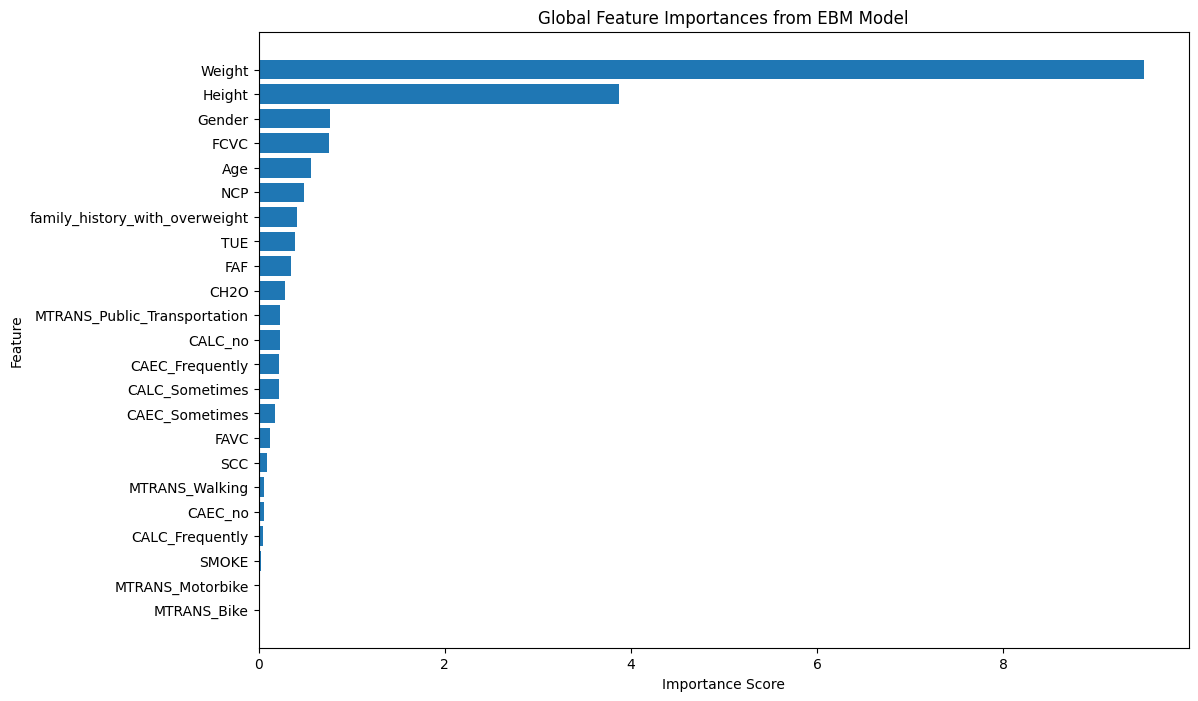

In [ ]:
global_importance_df = pd.DataFrame({
    'Feature': [
        'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O',
        'SCC', 'FAF', 'TUE', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes',
        'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'
    ],
    'Importance': importance
})

# Sort the DataFrame by importance
global_importance_df = global_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(global_importance_df['Feature'], global_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Global Feature Importances from EBM Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
show(global_explanation)

In [ ]:
from interpret import show

# Generate local explanations for specific samples
local_explanation = ebm.explain_local(X_test, y_test)
show([local_explanation])

next step: Compare with Other Models
Compare the EBM explanations and feature importances with those obtained from RuleFit, Decision Trees, and Random Forests.

In [ ]:
# Compare global feature importances
importances_rf = rf_classifier.feature_importances_
importances_dt = dt_classifier.feature_importances_

print("Random Forest Feature Importances:")
print(sorted(zip(X.columns, importances_rf), key=lambda x: x[1], reverse=True))

print("Decision Tree Feature Importances:")
print(sorted(zip(X.columns, importances_dt), key=lambda x: x[1], reverse=True))

#...

Random Forest Feature Importances:
[('Weight', 0.3163797447523308), ('Age', 0.09312057165450463), ('FCVC', 0.09105537078252433), ('Height', 0.08427893190963397), ('NCP', 0.0518982517766459), ('Gender', 0.04941073574154298), ('FAF', 0.047728644874125176), ('TUE', 0.04614721620183236), ('CH2O', 0.044732792787022094), ('family_history_with_overweight', 0.03627094082475365), ('CAEC_Sometimes', 0.026635398372034318), ('CALC_Sometimes', 0.02194752706454582), ('CAEC_Frequently', 0.018414295745536005), ('CALC_no', 0.018287426162261176), ('MTRANS_Public_Transportation', 0.01727024707865085), ('FAVC', 0.013073747852926289), ('CAEC_no', 0.006016580479142904), ('SCC', 0.005952787604426548), ('CALC_Frequently', 0.004510596091394633), ('MTRANS_Walking', 0.003162883653176543), ('SMOKE', 0.002374990428270061), ('MTRANS_Bike', 0.0007206113885151644), ('MTRANS_Motorbike', 0.0006097067742038549)]
Decision Tree Feature Importances:
[('Weight', 0.49347832978934236), ('Height', 0.20725719991932282), ('Gende

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.99      0.77      0.87       118
     NObeyesdad_Obesity_Type_I       0.00      0.00      0.00        78
    NObeyesdad_Obesity_Type_II       0.68      0.98      0.80        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.56      0.70      0.62        56
NObeyesdad_Overweight_Level_II       0.38      0.86      0.52        50

                      accuracy                           0.69       423
                     macro avg       0.60      0.72      0.64       423
                  weighted avg       0.64      0.69      0.64       423

Decision Tree Accuracy: 0.6926713947990544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import _tree

def print_tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    paths = []
    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            path.append(f"{name} <= {threshold}")
            recurse(tree_.children_left[node], path, paths)
            path.pop()
            path.append(f"{name} > {threshold}")
            recurse(tree_.children_right[node], path, paths)
            path.pop()
        else:
            path.append(f"leaf node: {tree_.value[node]}")
            paths.append(list(path))
            path.pop()
    recurse(0, [], paths)
    return paths

# Print the rules involving the 'SMOKE' feature
rules = print_tree_rules(pruned_dt_classifier, X.columns)
for rule in rules:
    if any('SMOKE' in step for step in rule):
        print(" AND ".join(rule))

In [ ]:
rules

[['Weight <= 0.2164793759584427',
  'Weight <= 0.15715669095516205',
  'Height <= 0.13025188446044922',
  'Weight <= 0.09328358247876167',
  'leaf node: [[3. 0. 0. 0. 0. 0.]]'],
 ['Weight <= 0.2164793759584427',
  'Weight <= 0.15715669095516205',
  'Height <= 0.13025188446044922',
  'Weight > 0.09328358247876167',
  'MTRANS_Motorbike <= 0.5',
  'leaf node: [[0. 0. 0. 0. 6. 1.]]'],
 ['Weight <= 0.2164793759584427',
  'Weight <= 0.15715669095516205',
  'Height <= 0.13025188446044922',
  'Weight > 0.09328358247876167',
  'MTRANS_Motorbike > 0.5',
  'leaf node: [[1. 0. 0. 0. 0. 0.]]'],
 ['Weight <= 0.2164793759584427',
  'Weight <= 0.15715669095516205',
  'Height > 0.13025188446044922',
  'Age <= 0.06320732831954956',
  'Age <= 0.06244978494942188',
  'leaf node: [[14.  0.  0.  0.  0.  0.]]'],
 ['Weight <= 0.2164793759584427',
  'Weight <= 0.15715669095516205',
  'Height > 0.13025188446044922',
  'Age <= 0.06320732831954956',
  'Age > 0.06244978494942188',
  'leaf node: [[0. 0. 0. 0. 1. 0.

In [ ]:
from rulefit import RuleFit
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize RuleFit with parameters to reduce the number of rules
rulefit = RuleFit(max_iter=1000, tree_size=2, sample_fract=0.5, rfmode='classify')

# Train RuleFit on the dataset
rulefit.fit(X_train.values, y_train)

# Make predictions with the RuleFit model
y_pred_rulefit = rulefit.predict(X_test.values)

# Round and clip predictions to ensure valid class labels
y_pred_rulefit_int = np.round(y_pred_rulefit).astype(int)
y_pred_rulefit_int = np.clip(y_pred_rulefit_int, 0, len(label_encoder.classes_) - 1)

# Evaluate the RuleFit model
print("RuleFit Classification Report:\n", classification_report(y_test, y_pred_rulefit_int))
print("RuleFit Accuracy:", accuracy_score(y_test, y_pred_rulefit_int))

# Decode the numeric labels back to original labels if needed for interpretation
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_rulefit_decoded = label_encoder.inverse_transform(y_pred_rulefit_int)
print("Decoded RuleFit Classification Report:\n", classification_report(y_test_decoded, y_pred_rulefit_decoded))
print("Decoded RuleFit Accuracy:", accuracy_score(y_test_decoded, y_pred_rulefit_decoded))


RuleFit Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.66      0.45      0.53        78
           2       0.53      1.00      0.69        58
           3       0.95      1.00      0.98        63
           4       0.80      0.64      0.71        56
           5       0.74      0.46      0.57        50

    accuracy                           0.78       423
   macro avg       0.78      0.75      0.74       423
weighted avg       0.80      0.78      0.77       423

RuleFit Accuracy: 0.7801418439716312
Decoded RuleFit Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.97      0.97      0.97       118
     NObeyesdad_Obesity_Type_I       0.66      0.45      0.53        78
    NObeyesdad_Obesity_Type_II       0.53      1.00      0.69        58
   NObeyesdad_Obesity_Type_III       0.95      1.00      0.

In [ ]:
print(dir(rulefit))

['Cs', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'coef_', 'cv', 'exp_rand_tree_size', 'feature_names', 'fit', 'fit_transform', 'friedscale', 'get_params', 'intercept_', 'lin_standardise', 'lin_trim_quantile', 'lscv', 'max_iter', 'max_rules', 'mean', 'memory_par', 'model_type', 'n_jobs', 'predict', 'predict_proba', 'random_state', 'rfmode', 'rule_ensemble', 'sample_fract', 'sample_fract_', 'set_output', 'set_params', 'stddev', 'tol', 'transfor

In [ ]:
rules = rulefit.rule_ensemble.rules
rules_df = pd.DataFrame([(rule.__str__(), rule.support, rule.prediction_value) for rule in rules], columns=['rule', 'support', 'prediction_value'])

# Filter out rules with zero prediction values (if necessary)
rules_df = rules_df[rules_df.prediction_value != 0].sort_values(by='prediction_value', ascending=False)

# Display the top rules
print(len(rules_df))
rules_df.head(20)

750


rule   support  prediction_value
335     feature_2 > 0.8957952857017517  0.002890          8.314951
351     feature_2 > 0.8083943426609039  0.008671          7.726527
393     feature_2 > 0.8091811537742615  0.005780          5.326487
439     feature_2 > 0.8951500058174133  0.002890          4.945577
297     feature_2 > 0.8022075593471527  0.014451          4.869256
543     feature_2 > 0.8962264358997345  0.002890          4.424358
427                   feature_19 > 0.5  0.002890          3.971432
373     feature_2 > 0.8151519000530243  0.017341          3.449763
309    feature_11 > 0.9821536540985107  0.023121          3.304186
263    feature_11 > 0.9998301565647125  0.031792          3.179222
219    feature_11 > 0.9540500044822693  0.037572          3.139579
627     feature_2 > 0.8915094435214996  0.002890          3.093112
2     feature_3 <= 0.16791044920682907  0.210983          3.069274
534  feature_6 <= 0.013174749910831451  0.005780          3.069164
495     feature_2 > 0.8105132281780243  0.020231          3.034855
377     feature_2 > 0.7918141484260559  0.028902          3.034122
619      feature_2 > 0.805717945098877  0.014451          3.000772
613    feature_11 > 0.9794493317604065  0.023121          2.832574
611     feature_2 > 0.8293434083461761  0.008671          2.802014
4     feature_3 <= 0.18927965313196182  0.260116          2.775405

from matplotlib import pyplot as plt
_df_0['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['prediction_value'].plot(kind='hist', bins=20, title='prediction_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='support', y='prediction_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['prediction_value'].plot(kind='line', figsize=(8, 4), title='prediction_value')
plt.gca().spines[['top', 'right']].set_visible(False)

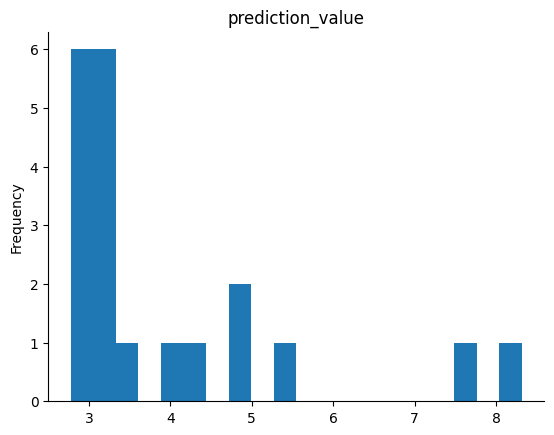

In [ ]:
from matplotlib import pyplot as plt
_df_1['prediction_value'].plot(kind='hist', bins=20, title='prediction_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Second approach (Combine weight with height = BMI)

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)

# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Display the first few rows of the refined encoded dataset
data_encoded.head()

Gender   Age  Height  Weight  family_history_with_overweight   FAVC  FCVC  \
0   False  21.0    1.62    64.0                            True  False   2.0   
1   False  21.0    1.52    56.0                            True  False   3.0   
2    True  23.0    1.80    77.0                            True  False   2.0   
3    True  27.0    1.80    87.0                           False  False   3.0   
4    True  22.0    1.78    89.8                           False  False   2.0   

   NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  3.0  False   2.0  ...        False             False   
1  3.0   True   3.0  ...        False             False   
2  3.0  False   2.0  ...        False             False   
3  3.0  False   2.0  ...        False             False   
4  1.0  False   2.0  ...        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      True   
1                          True           False                      True   
2                          True           False                      True   
3                         False            True                     False   
4                          True           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  

[5 rows x 29 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Select numerical columns to normalize
numerical_columns = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows of the normalized dataset
data_encoded.head()

Gender       Age  family_history_with_overweight   FAVC  FCVC       NCP  \
0   False  0.148936                            True  False   0.5  0.666667   
1   False  0.148936                            True  False   1.0  0.666667   
2    True  0.191489                            True  False   0.5  0.666667   
3    True  0.276596                           False  False   1.0  0.666667   
4    True  0.170213                           False  False   0.5  0.000000   

   SMOKE  CH2O    SCC       FAF  ...  MTRANS_Motorbike  \
0  False   0.5  False  0.000000  ...             False   
1   True   1.0   True  1.000000  ...             False   
2  False   0.5  False  0.666667  ...             False   
3  False   0.5  False  0.666667  ...             False   
4  False   0.5  False  0.000000  ...             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad_Normal_Weight  \
0                          True           False                      True   
1                          True           False                      True   
2                          True           False                      True   
3                         False            True                     False   
4                          True           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II       BMI  
0                           False  0.301162  
1                           False  0.297240  
2                           False  0.284736  
3                           False  0.366359  
4                            True  0.405778  

[5 rows x 28 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Define the features (X) and the target (y)
X = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
y = data_encoded[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y

0             NObeyesdad_Normal_Weight
1             NObeyesdad_Normal_Weight
2             NObeyesdad_Normal_Weight
3        NObeyesdad_Overweight_Level_I
4       NObeyesdad_Overweight_Level_II
                     ...              
2106       NObeyesdad_Obesity_Type_III
2107       NObeyesdad_Obesity_Type_III
2108       NObeyesdad_Obesity_Type_III
2109       NObeyesdad_Obesity_Type_III
2110       NObeyesdad_Obesity_Type_III
Length: 2111, dtype: object

In [ ]:

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.98      0.98      0.98       118
     NObeyesdad_Obesity_Type_I       0.99      0.95      0.97        78
    NObeyesdad_Obesity_Type_II       0.93      0.97      0.95        58
   NObeyesdad_Obesity_Type_III       0.98      1.00      0.99        63
 NObeyesdad_Overweight_Level_I       0.96      0.93      0.95        56
NObeyesdad_Overweight_Level_II       0.96      1.00      0.98        50

                      accuracy                           0.97       423
                     macro avg       0.97      0.97      0.97       423
                  weighted avg       0.97      0.97      0.97       423

Accuracy: 0.9716312056737588


{'NObeyesdad_Normal_Weight': {'precision': 0.9830508474576272,
  'recall': 0.9830508474576272,
  'f1-score': 0.9830508474576272,
  'support': 118},
 'NObeyesdad_Obesity_Type_I': {'precision': 0.9866666666666667,
  'recall': 0.9487179487179487,
  'f1-score': 0.9673202614379085,
  'support': 78},
 'NObeyesdad_Obesity_Type_II': {'precision': 0.9333333333333333,
  'recall': 0.9655172413793104,
  'f1-score': 0.9491525423728815,
  'support': 58},
 'NObeyesdad_Obesity_Type_III': {'precision': 0.984375,
  'recall': 1.0,
  'f1-score': 0.9921259842519685,
  'support': 63},
 'NObeyesdad_Overweight_Level_I': {'precision': 0.9629629629629629,
  'recall': 0.9285714285714286,
  'f1-score': 0.9454545454545454,
  'support': 56},
 'NObeyesdad_Overweight_Level_II': {'precision': 0.9615384615384616,
  'recall': 1.0,
  'f1-score': 0.9803921568627451,
  'support': 50},
 'accuracy': 0.9716312056737588,
 'macro avg': {'precision': 0.9686545453265086,
  'recall': 0.9709762443543858,
  'f1-score': 0.96958272297

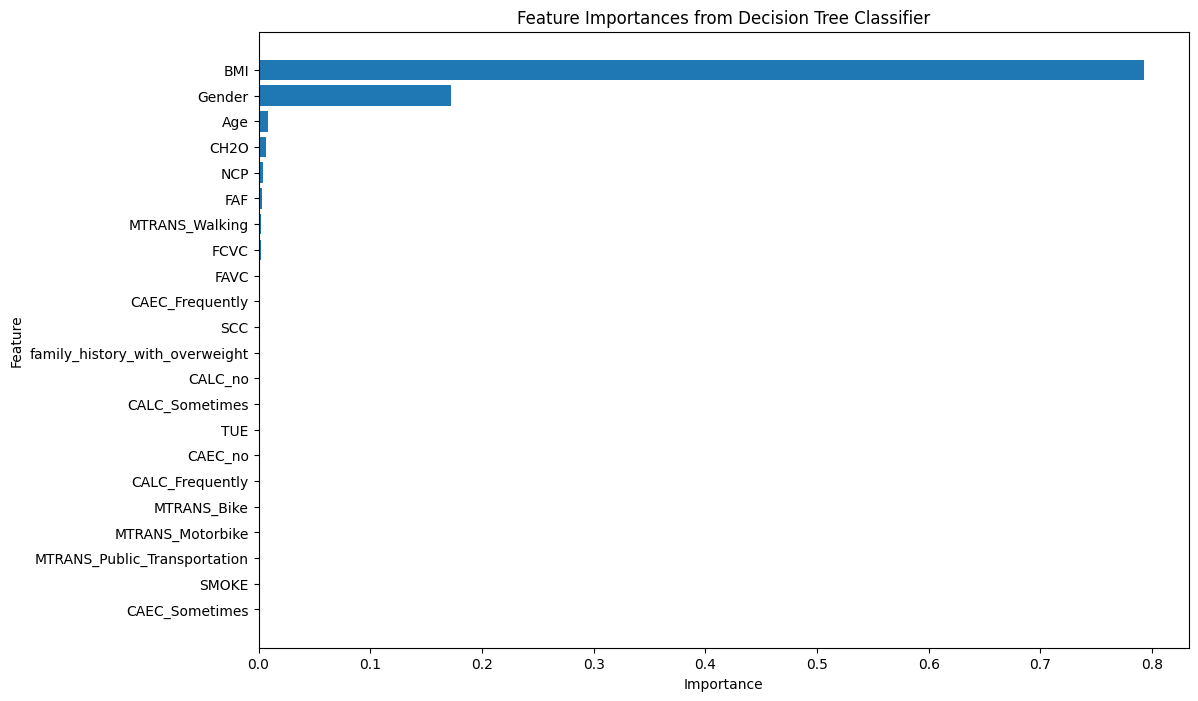

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

# Third approach (Combine weight with height = BMI) and use it as a categorical output

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)


# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Categorize BMI
'''
classification ranges defined by health organizations such as the World Health
Organization (WHO) and the Centers for Disease Control and Prevention (CDC).

These ranges are:
Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity I: 30 ≤ BMI < 34.9
Obesity II: 35 ≤ BMI < 39.9
Obesity III: BMI ≥ 40

'''
bmi_bins = [0, 18.5, 24.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data_encoded['BMI_Category'] = pd.cut(data_encoded['BMI'], bins=bmi_bins, labels=bmi_labels)

# Drop the original BMI column
data_encoded = data_encoded.drop(columns=['BMI'])



# Define the features (X) and the target (y)
data_encoded = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])

# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']
X.head()


Gender   Age  family_history_with_overweight   FAVC  FCVC  NCP  SMOKE  \
0   False  21.0                            True  False   2.0  3.0  False   
1   False  21.0                            True  False   3.0  3.0   True   
2    True  23.0                            True  False   2.0  3.0  False   
3    True  27.0                           False  False   3.0  3.0  False   
4    True  22.0                           False  False   2.0  1.0  False   

   CH2O    SCC  FAF  ...  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0   2.0  False  0.0  ...            False            True    False   
1   3.0   True  3.0  ...            False            True    False   
2   2.0  False  2.0  ...            False            True    False   
3   2.0  False  2.0  ...            False            True    False   
4   2.0  False  0.0  ...            False            True    False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0            False           False     True        False             False   
1            False            True    False        False             False   
2             True           False    False        False             False   
3             True           False    False        False             False   
4            False            True    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                          True           False  
1                          True           False  
2                          True           False  
3                         False            True  
4                          True           False  

[5 rows x 21 columns]

## Decision tree


In [27]:
# Display the distribution of each class in the target variable y
class_distribution = y.value_counts()

# Convert the distribution to a DataFrame for better readability
class_distribution_df = class_distribution.reset_index()
class_distribution_df.columns = ['BMI_Category', 'Count']

print(class_distribution_df)

    BMI_Category  Count
0     Overweight   1273
1  Normal weight    296
2    Underweight    271
3          Obese    271


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                precision    recall  f1-score   support

Normal weight       0.49      0.43      0.46        67
        Obese       0.96      0.95      0.96        58
   Overweight       0.87      0.88      0.87       244
  Underweight       0.77      0.85      0.81        54

     accuracy                           0.81       423
    macro avg       0.77      0.78      0.77       423
 weighted avg       0.81      0.81      0.81       423

Accuracy: 0.8132387706855791


{'Normal weight': {'precision': 0.4915254237288136,
  'recall': 0.43283582089552236,
  'f1-score': 0.46031746031746035,
  'support': 67},
 'Obese': {'precision': 0.9649122807017544,
  'recall': 0.9482758620689655,
  'f1-score': 0.9565217391304347,
  'support': 58},
 'Overweight': {'precision': 0.8663967611336032,
  'recall': 0.8770491803278688,
  'f1-score': 0.8716904276985743,
  'support': 244},
 'Underweight': {'precision': 0.7666666666666667,
  'recall': 0.8518518518518519,
  'f1-score': 0.8070175438596491,
  'support': 54},
 'accuracy': 0.8132387706855791,
 'macro avg': {'precision': 0.7723752830577094,
  'recall': 0.7775031787860522,
  'f1-score': 0.7738867927515296,
  'support': 423},
 'weighted avg': {'precision': 0.8077965139175685,
  'recall': 0.8132387706855791,
  'f1-score': 0.8099076653373717,
  'support': 423}}

### Counterfactuals

In [ ]:
# Function to generate counterfactuals
def generate_counterfactual(instance, model, original_class, target_class, binary_columns):
    counterfactual = instance.copy()
    for feature in X.columns:
        original_value = instance[feature]
        if feature in binary_columns:
            counterfactual[feature] = not original_value  # Flip the boolean value
        else:
            for change in [-0.1, 0.1]:  # Adjusting feature value slightly
                counterfactual[feature] = original_value + change
                new_prediction = model.predict([counterfactual])
                if new_prediction == target_class:
                    return counterfactual
            # Reset to original value if no change succeeded
            counterfactual[feature] = original_value
    return None

# Choose an instance from the test set
instance_index = 100  # Change this index to select a different instance
instance = X_test.iloc[instance_index]
original_class = y_test.iloc[instance_index]

# Generate counterfactual for the selected instance
target_class = 'Normal weight'  # Change this to the desired target class
counterfactual = generate_counterfactual(instance, dt_classifier, original_class, target_class, binary_columns)

print(f"Original instance:\n{instance}")
print(f"Original class: {original_class}")
if counterfactual is not None:
    print(f"Counterfactual instance:\n{counterfactual}")
else:
    print("No counterfactual instance found that changes the class to the target class.")

Original instance:
Gender                                 True
Age                               20.975973
family_history_with_overweight         True
FAVC                                   True
FCVC                                    2.0
NCP                                     3.0
SMOKE                                 False
CH2O                               1.025275
SCC                                   False
FAF                                 0.00203
TUE                                0.175587
CAEC_Frequently                       False
CAEC_Sometimes                         True
CAEC_no                               False
CALC_Frequently                       False
CALC_Sometimes                         True
CALC_no                               False
MTRANS_Bike                           False
MTRANS_Motorbike                      False
MTRANS_Public_Transportation           True
MTRANS_Walking                        False
Name: 1452, dtype: object
Original class: Overweight
Coun

In [ ]:
# CHANGING ONLY FEATURES THAT CAN BE CHANGE IN REAL LIFE

# List of modifiable features
modifiable_features = [col for col in X.columns if col not in ['Gender', 'family_history_with_overweight', 'Age']]

# Function to generate counterfactuals considering only modifiable features
def generate_counterfactual(instance, model, original_class, target_class, binary_columns, modifiable_features):
    counterfactual = instance.copy()
    for feature in modifiable_features:
        original_value = instance[feature]
        if feature in binary_columns:
            counterfactual[feature] = not original_value  # Flip the boolean value
        else:
            for change in [-0.1, 0.1]:  # Adjusting feature value slightly
                counterfactual[feature] = original_value + change
                new_prediction = model.predict([counterfactual])
                if new_prediction == target_class:
                    return counterfactual
            # Reset to original value if no change succeeded
            counterfactual[feature] = original_value
    return None

# Choose an instance from the test set
instance_index = 100  # Change this index to select a different instance
instance = X_test.iloc[instance_index]
original_class = y_test.iloc[instance_index]

# Generate counterfactual for the selected instance
target_class = 'Normal weight'  # Change this to the desired target class
counterfactual = generate_counterfactual(instance, dt_classifier, original_class, target_class, binary_columns, modifiable_features)

print(f"Original instance:\n{instance}")
print(f"Original class: {original_class}")
if counterfactual is not None:
    print(f"Counterfactual instance:\n{counterfactual}")
else:
    print("No counterfactual instance found that changes the class to the target class.")

Original instance:
Gender                                 True
Age                               20.975973
family_history_with_overweight         True
FAVC                                   True
FCVC                                    2.0
NCP                                     3.0
SMOKE                                 False
CH2O                               1.025275
SCC                                   False
FAF                                 0.00203
TUE                                0.175587
CAEC_Frequently                       False
CAEC_Sometimes                         True
CAEC_no                               False
CALC_Frequently                       False
CALC_Sometimes                         True
CALC_no                               False
MTRANS_Bike                           False
MTRANS_Motorbike                      False
MTRANS_Public_Transportation           True
MTRANS_Walking                        False
Name: 1452, dtype: object
Original class: Overweight
Coun

we can see FAVC(Do you eat high caloric food frequently?) changed from true to false that it makes sense in order to reduce weight

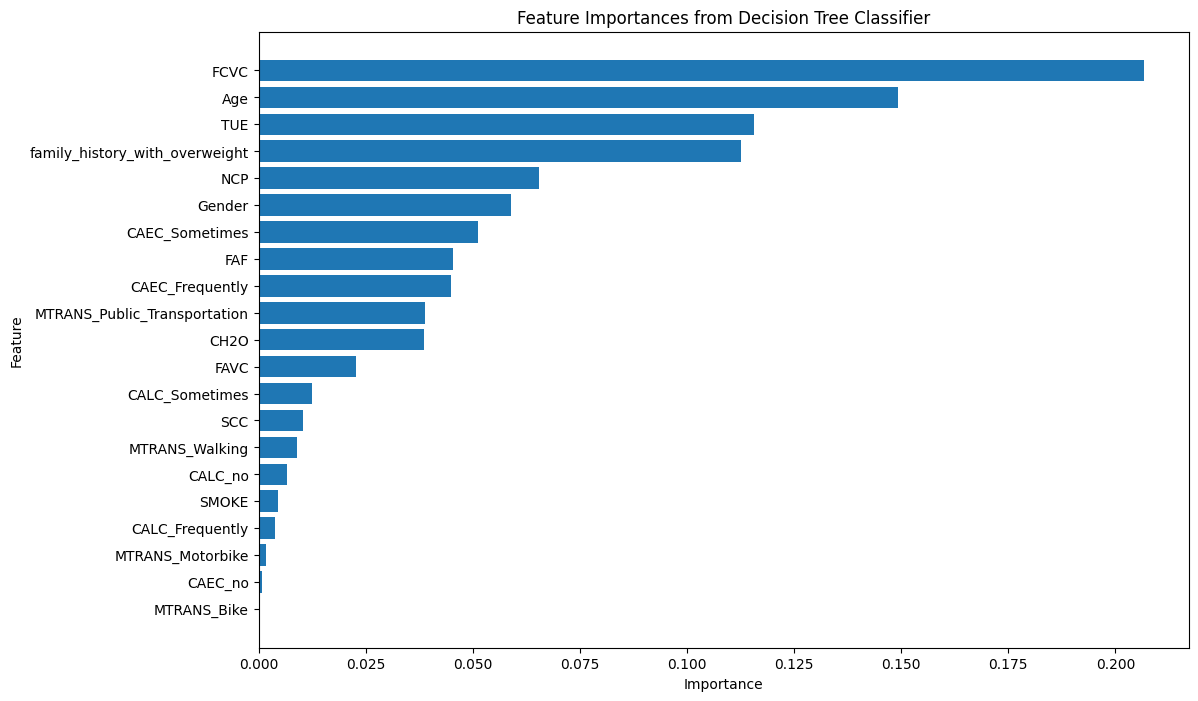

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

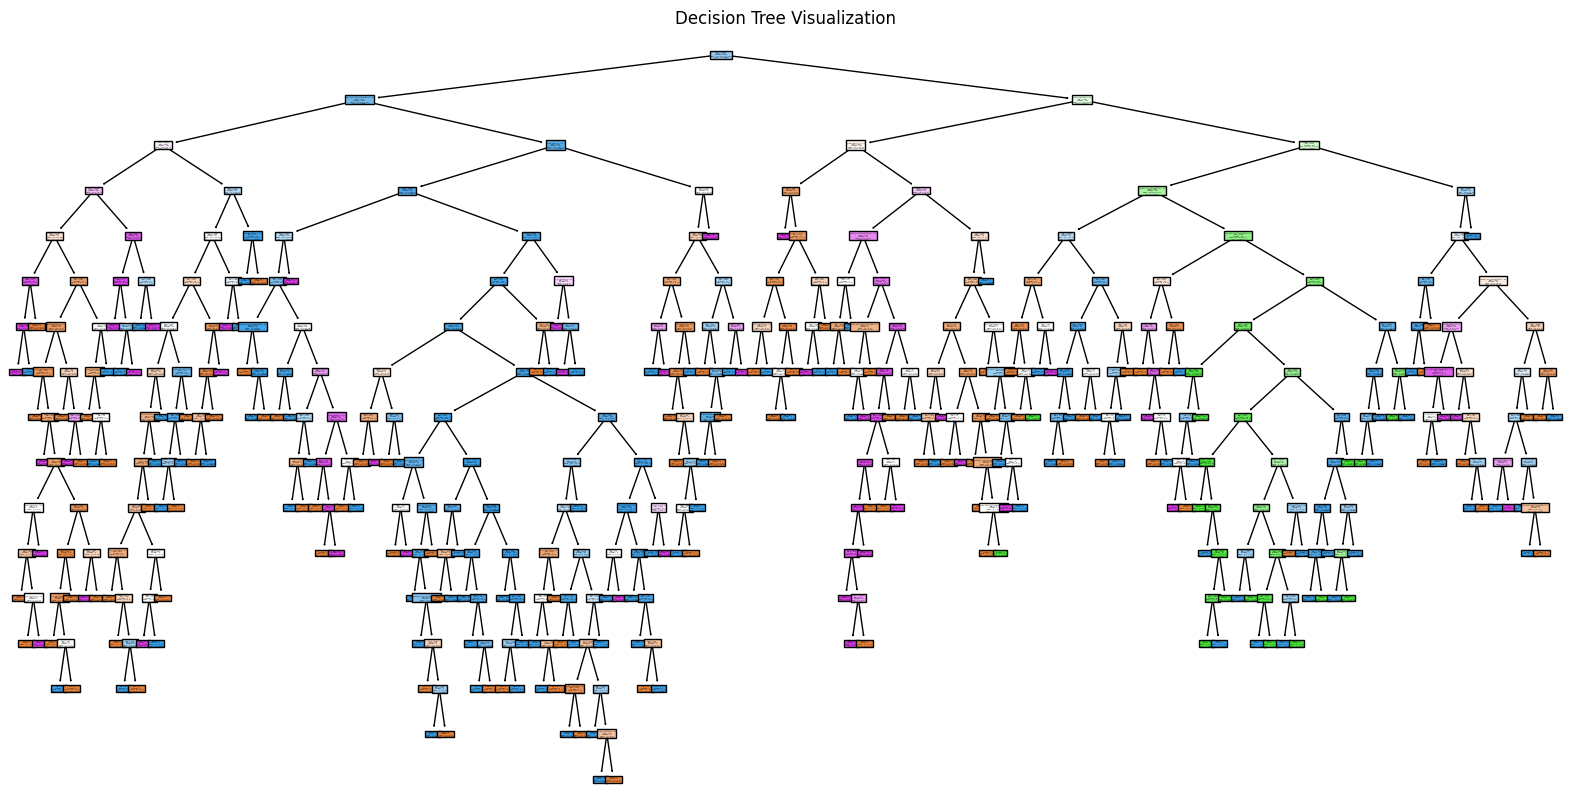

In [ ]:
# Plot the Decision Tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

## Pruning the Decision Tree

In [ ]:
# Initialize a pruned Decision Tree Classifier with a maximum depth
pruned_dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the pruned model
pruned_dt_classifier.fit(X_train, y_train)

# Make predictions with the pruned model
y_pred_pruned = pruned_dt_classifier.predict(X_test)

# Evaluate the pruned model
classification_report_pruned = classification_report(y_test, y_pred_pruned, output_dict=True)
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
classification_report_pruned

Accuracy: 0.7848699763593381


{'Normal weight': {'precision': 0.5142857142857142,
  'recall': 0.5373134328358209,
  'f1-score': 0.5255474452554744,
  'support': 67},
 'Obese': {'precision': 0.7733333333333333,
  'recall': 1.0,
  'f1-score': 0.8721804511278195,
  'support': 58},
 'Overweight': {'precision': 0.8634538152610441,
  'recall': 0.8811475409836066,
  'f1-score': 0.8722109533468559,
  'support': 244},
 'Underweight': {'precision': 0.7931034482758621,
  'recall': 0.42592592592592593,
  'f1-score': 0.5542168674698795,
  'support': 54},
 'accuracy': 0.7848699763593381,
 'macro avg': {'precision': 0.7360440777889885,
  'recall': 0.7110967249363384,
  'f1-score': 0.7060389293000073,
  'support': 423},
 'weighted avg': {'precision': 0.7868103861018145,
  'recall': 0.7848699763593381,
  'f1-score': 0.776702904154933,
  'support': 423}}

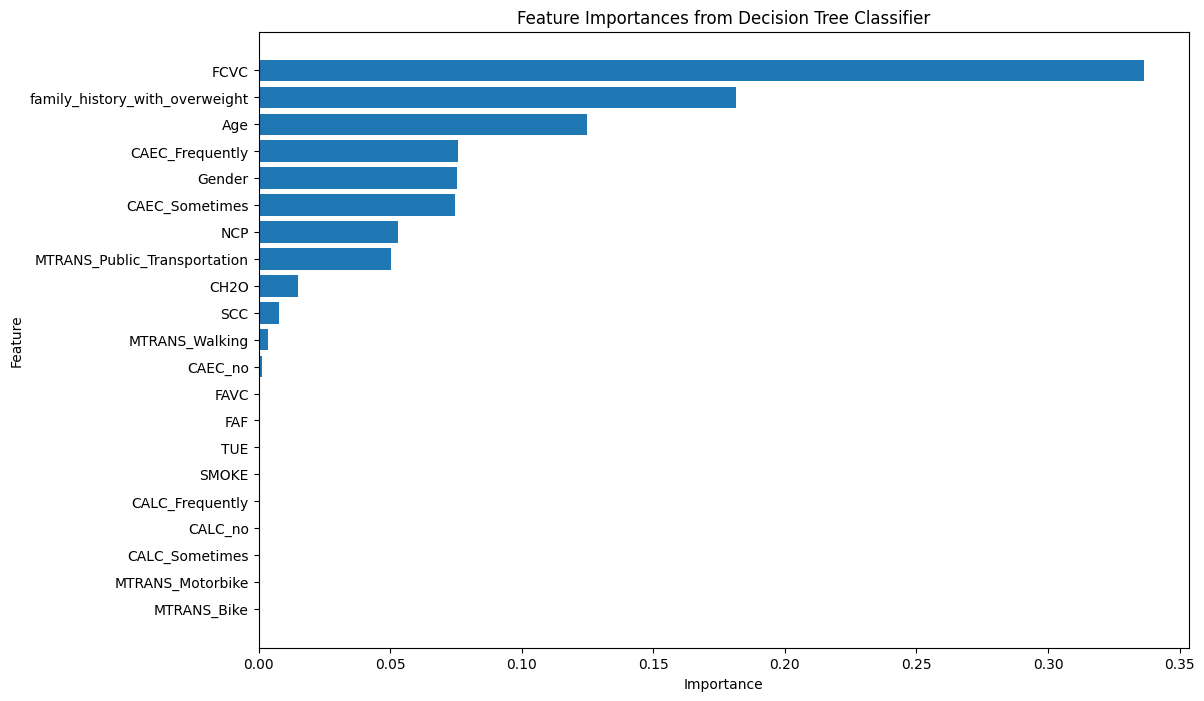

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = pruned_dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

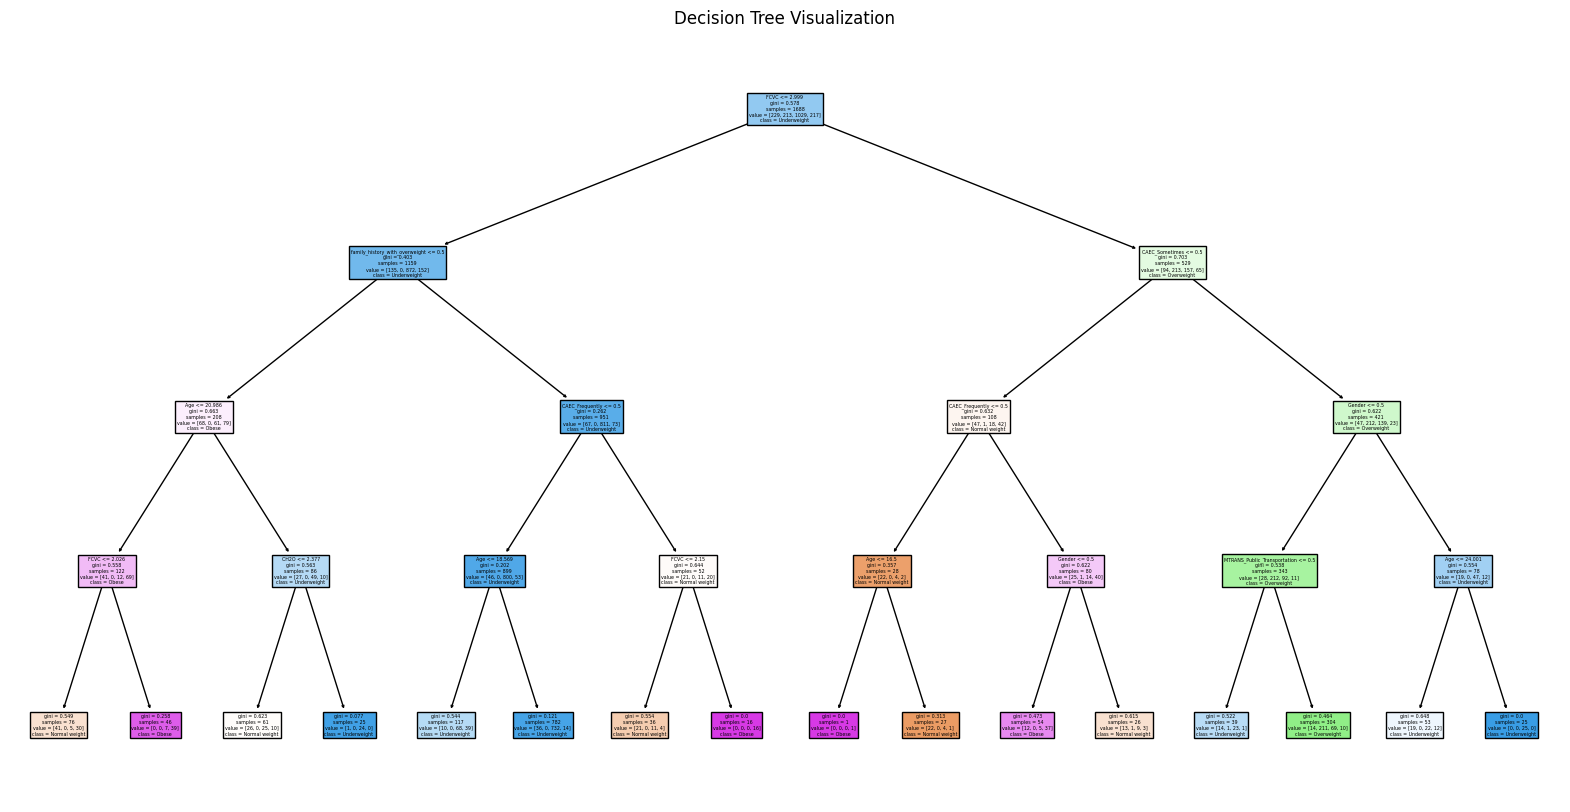

In [ ]:
# Plot the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.savefig("tree.pdf")
plt.show()


## Random Forest

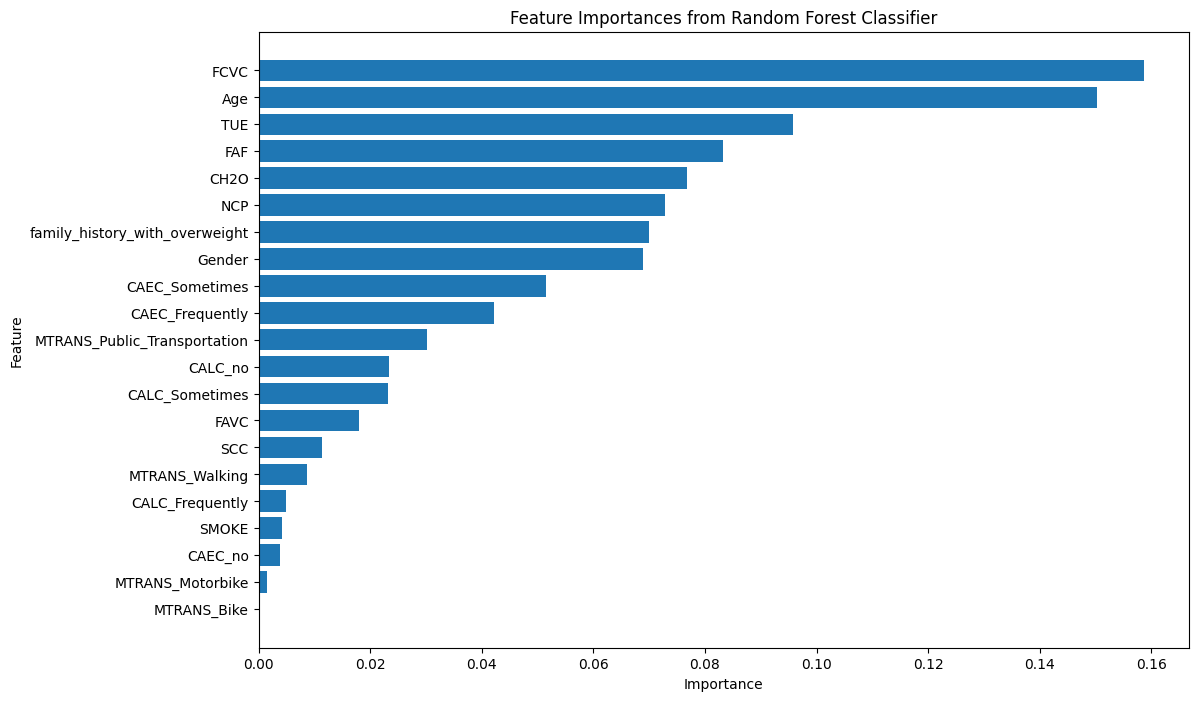

Accuracy: 0.8865248226950354


{'Normal weight': {'precision': 0.7413793103448276,
  'recall': 0.6417910447761194,
  'f1-score': 0.688,
  'support': 67},
 'Obese': {'precision': 0.9818181818181818,
  'recall': 0.9310344827586207,
  'f1-score': 0.9557522123893805,
  'support': 58},
 'Overweight': {'precision': 0.8984375,
  'recall': 0.9426229508196722,
  'f1-score': 0.92,
  'support': 244},
 'Underweight': {'precision': 0.8888888888888888,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54},
 'accuracy': 0.8865248226950354,
 'macro avg': {'precision': 0.8776309702629745,
  'recall': 0.8510843418108253,
  'f1-score': 0.8631602753195673,
  'support': 423},
 'weighted avg': {'precision': 0.8837745114386714,
  'recall': 0.8865248226950354,
  'f1-score': 0.8841835184836503,
  'support': 423}}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=46, random_state=0, max_depth = 15, criterion='entropy')
rf_classifier.fit(X_train, y_train)

# Extract feature importances
rf_feature_importances = rf_classifier.feature_importances_
#
# Create a DataFrame for visualization
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the Random Forest
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Make predictions with the Random Forest model
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_report_rf

## Gradient Boosting Model (LightGBM)

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 19
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -2.070008
[LightGBM] [Info] Start training from score -0.494957
[LightGBM] [Info] Start training from score -2.051402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.71      0.63      0.67        67
        Obese       0.98      0.88      0.93        58
   Overweight       0.90      0.93      0.91       244
  Underweight       0.85      0.93      0.88        54

     accuracy                           0.87   

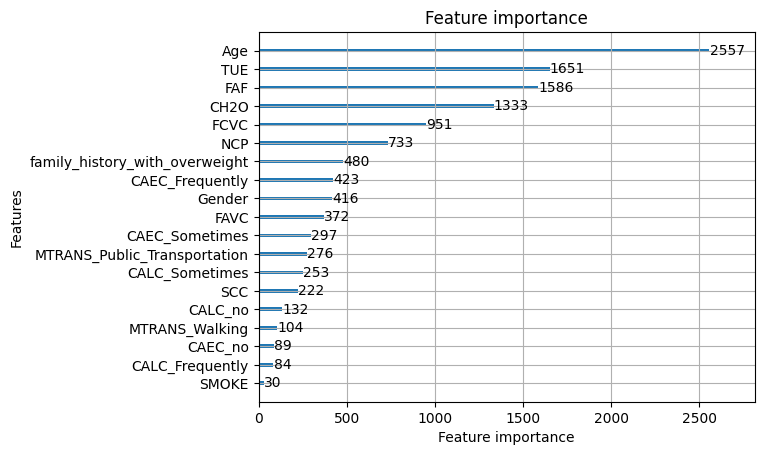

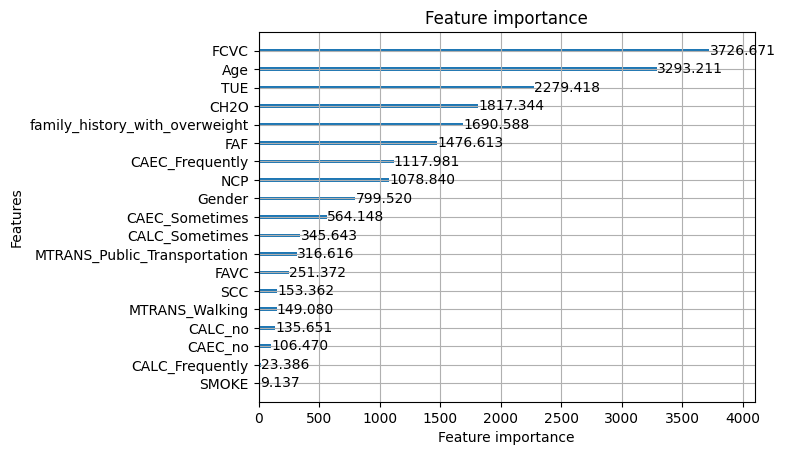

In [ ]:
# Plot feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 19
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -2.070008
[LightGBM] [Info] Start training from score -0.494957
[LightGBM] [Info] Start training from score -2.051402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
                precision    recall  f1-score   support

Normal weight       0.71      0.63      0.67        67
        Obese       0.98      0.88      0.93        58
   Overweight       0.90      0.93      0.91       244
  Underweight       0.85      0.93      0.88        54

     accuracy                           0.87       423
    macro avg       0.86      0.84      0.85       423
 

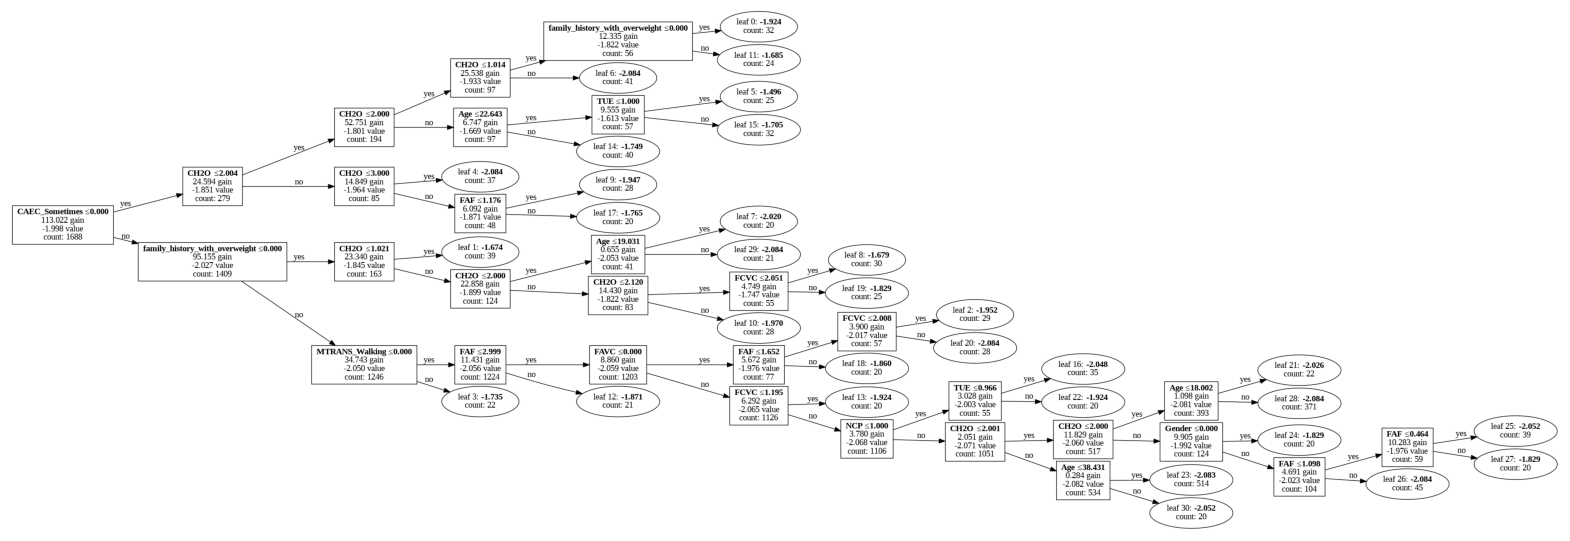

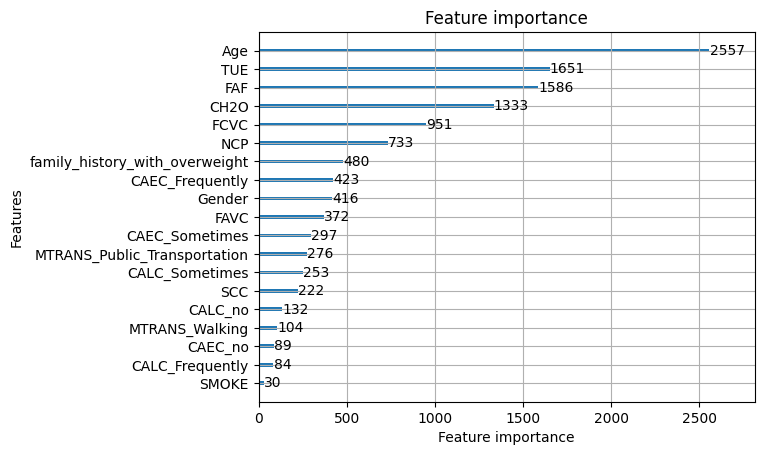

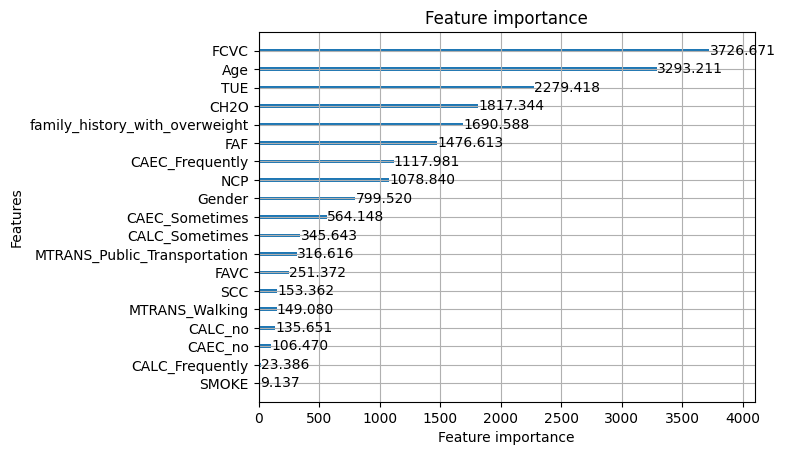

In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

# Plot the first tree
fig, ax = plt.subplots(figsize=(20, 10))
lgb.plot_tree(lgb_classifier, tree_index=0, ax=ax, show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count'])
plt.show()

# Plot the feature importance
lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='split')
plt.show()

lgb.plot_importance(lgb_classifier, max_num_features=20, importance_type='gain')
plt.show()

## Rule filt

In [5]:
!pip install git+https://github.com/christophM/rulefit.git

  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-req-build-kx1gupd6
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-req-build-kx1gupd6
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done
  Created wheel for RuleFit: filename=RuleFit-0.3-py3-none-any.whl size=8083 sha256=e092b731daef7fc865b5c11796ffe02874cb4ad5e747b403d006b4b805b36f27
  Stored in directory: /tmp/pip-ephem-wheel-cache-2g2rwk62/wheels/d6/cf/9c/8838db2e27ac18c3002e2e2fcaa90b2210f681e60ad529e613
Successfully built RuleFit


In [6]:
one_hot_columns = [ 'BMI_Category']
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)
data_encoded

KeyError: "None of [Index(['BMI_Category'], dtype='object')] are in the [columns]"

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from rulefit import RuleFit
import numpy as np

# y = data_encoded[['Underweight','BMI_Category_Normal weight','BMI_Category_Overweight','BMI_Category_Obese']].idxmax(axis=1)

# Convert boolean columns to integers
X = X.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

y

0       Normal weight
1       Normal weight
2       Normal weight
3          Overweight
4          Overweight
            ...      
2106            Obese
2107            Obese
2108            Obese
2109            Obese
2110            Obese
Name: BMI_Category, Length: 2111, dtype: category
Categories (4, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese']

In [ ]:
# Initialize RuleFit with explicit max_iter for LassoCV
rulefit = RuleFit(max_iter=1000)

# Train RuleFit on the dataset
rulefit.fit(X_train.values, y_train)

# Make predictions with the RuleFit model
y_pred_rulefit = rulefit.predict(X_test.values)

# Round and clip predictions to ensure valid class labels
y_pred_rulefit_int = np.round(y_pred_rulefit).astype(int)
y_pred_rulefit_int = np.clip(y_pred_rulefit_int, 0, len(label_encoder.classes_) - 1)

# Evaluate the RuleFit model
print("RuleFit Classification Report:\n", classification_report(y_test, y_pred_rulefit_int))
print("RuleFit Accuracy:", accuracy_score(y_test, y_pred_rulefit_int))

# Decode the numeric labels back to original labels if needed for interpretation
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_rulefit_decoded = label_encoder.inverse_transform(y_pred_rulefit_int)
print("Decoded RuleFit Classification Report:\n", classification_report(y_test_decoded, y_pred_rulefit_decoded))
print("Decoded RuleFit Accuracy:", accuracy_score(y_test_decoded, y_pred_rulefit_decoded))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.194e-02, tolerance: 8.086e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.129e-01, tolerance: 8.086e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.119e-01, tolerance: 8.086e

RuleFit Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.22      0.34        67
           1       0.46      0.93      0.61        58
           2       0.83      0.85      0.84       244
           3       0.94      0.59      0.73        54

    accuracy                           0.73       423
   macro avg       0.74      0.65      0.63       423
weighted avg       0.78      0.73      0.72       423

RuleFit Accuracy: 0.7304964539007093
Decoded RuleFit Classification Report:
                precision    recall  f1-score   support

Normal weight       0.75      0.22      0.34        67
        Obese       0.46      0.93      0.61        58
   Overweight       0.83      0.85      0.84       244
  Underweight       0.94      0.59      0.73        54

     accuracy                           0.73       423
    macro avg       0.74      0.65      0.63       423
 weighted avg       0.78      0.73      0.72       423

Decoded RuleF

In [ ]:
rules = rulefit.rule_ensemble.rules
rules_df = pd.DataFrame([(rule.__str__(), rule.support, rule.prediction_value) for rule in rules], columns=['rule', 'support', 'prediction_value'])

# Filter out rules with zero prediction values (if necessary)
rules_df = rules_df[rules_df.prediction_value != 0].sort_values(by='prediction_value', ascending=False)

# Display the top rules
print(len(rules_df))

1677


In [ ]:
rules_df.to_csv('rulefit_rules.csv', index=False)

## EBM Model

In [8]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.1-py3-none-any.whl size=4010600 sha256=66b451e99cfd1eefa165eef434e68e75d4f20df48cd0

In [9]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Make predictions with the EBM model
y_pred_ebm = ebm.predict(X_test)

# Evaluate the EBM model
print("EBM Classification Report:\n", classification_report(y_test, y_pred_ebm))
print("EBM Accuracy:", accuracy_score(y_test, y_pred_ebm))

/usr/local/lib/python3.10/dist-packages/interpret/glassbox/_ebm/_ebm.py:999: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


EBM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61        67
           1       0.96      0.84      0.90        58
           2       0.84      0.91      0.87       244
           3       0.75      0.67      0.71        54

    accuracy                           0.82       423
   macro avg       0.80      0.75      0.77       423
weighted avg       0.82      0.82      0.81       423

EBM Accuracy: 0.817966903073286


In [10]:
global_explanation = ebm.explain_global()
importance = []
features = []
print("Global Feature Importances:")
for i, feature in enumerate(global_explanation.data()['names']):
    print(f"{feature}: {global_explanation.data()['scores'][i]}")
    features.append(feature)
    importance.append(global_explanation.data()['scores'][i])

Global Feature Importances:
Gender: 0.46746477003740416
Age: 0.5620016769857796
family_history_with_overweight: 0.42640664964119684
FAVC: 0.10245703119544676
FCVC: 0.7366636498490498
NCP: 0.4289083259219306
SMOKE: 0.030872636601604025
CH2O: 0.3346891959458816
SCC: 0.07182902870844318
FAF: 0.27515162576758595
TUE: 0.4194422294121998
CAEC_Frequently: 0.12948054407128878
CAEC_Sometimes: 0.19874228067243171
CAEC_no: 0.05755428801609777
CALC_Frequently: 0.07995093928334457
CALC_Sometimes: 0.21776899066932393
CALC_no: 0.19345543661048814
MTRANS_Bike: 0.005550078425529168
MTRANS_Motorbike: 0.01760126666114735
MTRANS_Public_Transportation: 0.2542280100287849
MTRANS_Walking: 0.053117532763260464


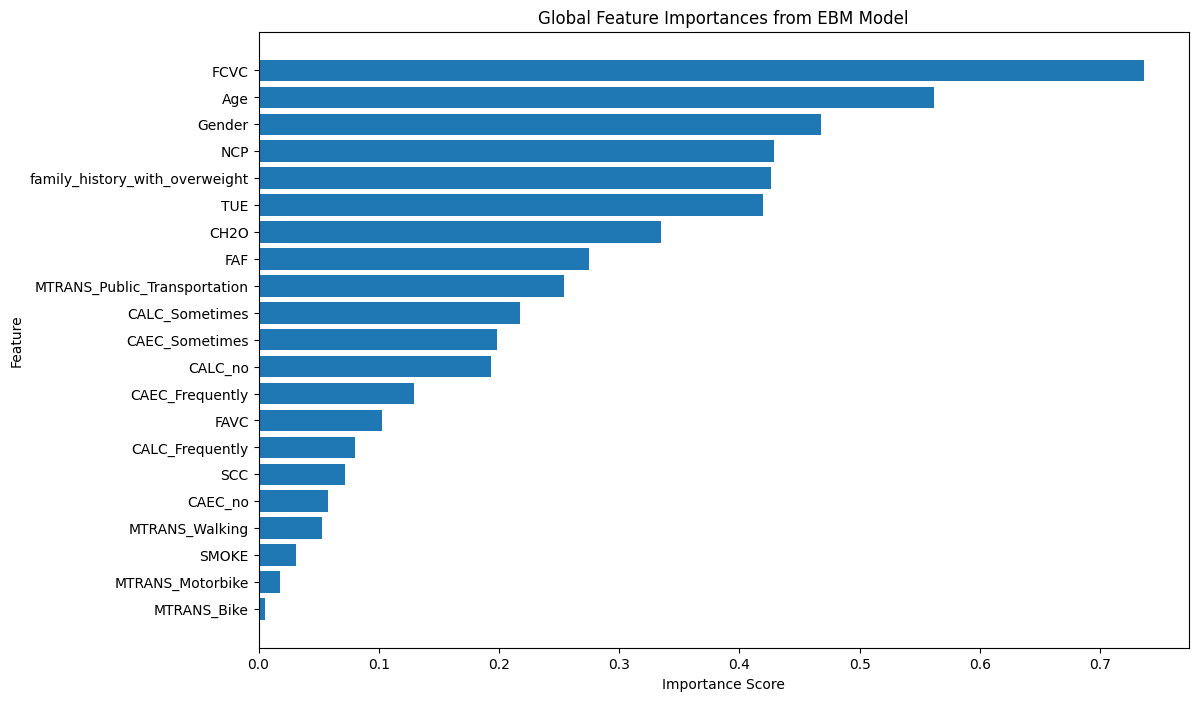

In [11]:
import matplotlib.pyplot as plt
global_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sort the DataFrame by importance
global_importance_df = global_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(global_importance_df['Feature'], global_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Global Feature Importances from EBM Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
show(global_explanation)

In [15]:
# Checking local explainations for randoom instances
instance_1 = X_test.iloc[[0]]
instance_1_label = pd.DataFrame([y_test[2]])
instance_2 = X_test.iloc[[100]]
instance_2_label = pd.DataFrame([y_test[100]])
instance_2_label

0
0  2

In [16]:
from interpret import show
from interpret import show
# Generate local explanations for specific samples
local_explanation_1 = ebm.explain_local(instance_1, instance_1_label)
local_explanation_2 = ebm.explain_local(instance_2, instance_2_label)
show(local_explanation_1)
show(local_explanation_2)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

# Assume ebm, X_test, and y_test are already defined as in your code

# Make predictions with the EBM model
y_pred_ebm = ebm.predict(X_test)
y_pred_proba_ebm = ebm.predict_proba(X_test)

# Calculate confusion matrix to identify misclassified instances
cm = confusion_matrix(y_test, y_pred_ebm)
print("Confusion Matrix:\n", cm)

# Identify misclassified instances
misclassified_indices = np.where(y_test != y_pred_ebm)[0]

# Convert y_test to pandas Series if it's not already
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

# Get misclassified instances
misclassified_instances = X_test.iloc[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]

# Generate local explanations for misclassified instances
local_explanations = []
for index in misclassified_indices:
    instance = X_test.iloc[[index]]
    true_label = y_test.iloc[[index]]
    local_explanation = ebm.explain_local(instance, true_label)
    local_explanations.append(local_explanation)
    show(local_explanation)


Confusion Matrix:
 [[ 39   0  18  10]
 [  0  49   9   0]
 [ 18   2 222   2]
 [  3   0  15  36]]


In [25]:
# Analyze the explanations to understand what contributed to the wrong predictions
for explanation in local_explanations:
    feature_contributions = explanation.data(0)['scores'][0]
    for feature, contribution in zip(explanation.data(0)['names'], feature_contributions):
        print(f"Feature: {feature}, Contribution: {contribution}")
    break
# Example of visualizing contributions for the first misclassified instance
contributions = local_explanations[0].data(0)['scores'][0]
features = local_explanations[0].data(0)['names']

# Ensure lengths are the same
if len(features) == len(contributions):
    # Create a DataFrame for visualization
    contrib_df = pd.DataFrame({
        'Feature': features,
        'Contribution': contributions
    }).sort_values(by='Contribution', ascending=False)

    # Plot the contributions
    plt.figure(figsize=(12, 8))
    plt.barh(contrib_df['Feature'], contrib_df['Contribution'])
    plt.xlabel('Contribution Score')
    plt.ylabel('Feature')
    plt.title('Feature Contributions for Misclassified Instance')
    plt.gca().invert_yaxis()
    plt.show()

Feature: Gender, Contribution: 0.012403611102829577
Feature: Age, Contribution: -1.4505865300202987
Feature: family_history_with_overweight, Contribution: 0.3064761079564352
Feature: FAVC, Contribution: 0.07633616454181223


In [ ]:
import matplotlib.pyplot as plt

# Example of visualizing contributions for the first misclassified instance
contributions = local_explanations[0].data(0)['scores'][0]
features = local_explanations[0].data(0)['names']

# Create a DataFrame for visualization
import pandas as pd
contrib_df = pd.DataFrame({
    'Feature': features,
    'Contribution': contributions
}).sort_values(by='Contribution', ascending=False)

# Plot the contributions
plt.figure(figsize=(12, 8))
plt.barh(contrib_df['Feature'], contrib_df['Contribution'])
plt.xlabel('Contribution Score')
plt.ylabel('Feature')
plt.title('Feature Contributions for Misclassified Instance')
plt.gca().invert_yaxis()
plt.show()

In [14]:
# local explanations for the first development instance
instance1_local_importance = local_explanation_1.data(0)

print("\nLocal explanations for the first development instance:")
for feature, score in zip(instance1_local_importance['names'], instance1_local_importance['scores']):
    print(f"{feature}: {score}")

# local explanations for the second development instance
instance2_local_importance = local_explanation_2.data(0)

print("\nLocal explanations for the second development instance:")
for feature, score in zip(instance2_local_importance['names'], instance2_local_importance['scores']):
    print(f"{feature}: {score}")


Local explanations for the first development instance:
Gender: [-0.0127312   1.48889734 -0.31457031 -0.07835225]
Age: [ 0.24328762  0.51004181 -0.4706362   0.80189783]
family_history_with_overweight: [-0.11702992  0.52327531  0.18031047 -0.22027284]
FAVC: [-0.02498978  0.18579781 -0.01621836 -0.0037445 ]
FCVC: [ 0.70613793 -1.6390319   0.18497942 -0.37315971]
NCP: [-0.46930752 -0.8318761  -0.47009186  0.87431917]
SMOKE: [-0.01260264  0.01561172 -0.00255318  0.03243806]
CH2O: [-0.32046665  0.33245308 -0.09085433  0.24469587]
SCC: [-0.02278106  0.11690618 -0.00210963  0.00844773]
FAF: [-0.22470314 -1.34072508  0.33166205 -0.1611492 ]
TUE: [ 0.45444903 -2.520237    0.02672011  0.26095989]
CAEC_Frequently: [-0.05712815 -0.50900234 -0.67828269  1.04420629]
CAEC_Sometimes: [ 0.47041075 -1.0597889  -0.47853471  0.39611847]
CAEC_no: [ 0.01459889  0.05888051 -0.02378971  0.02070494]
CALC_Frequently: [-0.00215025  0.08025916 -0.02721214  0.05566587]
CALC_Sometimes: [ 0.09966006 -1.0246671   0.0

# NEURAL NETWORK

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)


# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Categorize BMI
'''
classification ranges defined by health organizations such as the World Health
Organization (WHO) and the Centers for Disease Control and Prevention (CDC).

These ranges are:
Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity I: 30 ≤ BMI < 34.9
Obesity II: 35 ≤ BMI < 39.9
Obesity III: BMI ≥ 40

'''
bmi_bins = [0, 18.5, 24.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data_encoded['BMI_Category'] = pd.cut(data_encoded['BMI'], bins=bmi_bins, labels=bmi_labels)

# Drop the original BMI column
data_encoded = data_encoded.drop(columns=['BMI'])



# Define the features (X) and the target (y)
data_encoded = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)
# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)


# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))




Epoch 1/50
43/43 [==============================] - 2s 10ms/step - loss: 1.1448 - accuracy: 0.5881 - val_loss: 0.8846 - val_accuracy: 0.6479
Epoch 2/50
43/43 [==============================] - 0s 4ms/step - loss: 0.8276 - accuracy: 0.6578 - val_loss: 0.7266 - val_accuracy: 0.7781
Epoch 3/50
43/43 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.7259 - val_loss: 0.6213 - val_accuracy: 0.7367
Epoch 4/50
43/43 [==============================] - 0s 4ms/step - loss: 0.6154 - accuracy: 0.7593 - val_loss: 0.5758 - val_accuracy: 0.7633
Epoch 5/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7704 - val_loss: 0.5496 - val_accuracy: 0.7840
Epoch 6/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5749 - accuracy: 0.7667 - val_loss: 0.5490 - val_accuracy: 0.7781
Epoch 7/50
43/43 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.7756 - val_loss: 0.5301 - val_accuracy: 0.7811
Epoch 8/50
43/43 [=

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming X_test and y_test_encoded are already defined and preprocessed
# Also assuming 'model' is your trained TensorFlow model

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predicted labels with true labels and find correct classifications
correct_classifications = np.where(y_pred_classes == y_test_encoded)[0]

# Print the correctly classified indexes
print("Correctly classified indexes from the test set:")
print(correct_classifications)

# Optional: Print detailed classification report
print(classification_report(y_test_encoded, y_pred_classes))


14/14 [==============================] - 0s 5ms/step
Correctly classified indexes from the test set:
[  0   1   2   4   5   6   7   8   9  10  11  13  14  15  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  39  40
  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57  59  60
  61  62  63  64  66  67  69  70  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  92  93  95  96  98  99 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 118 119 120 121 122 123
 124 125 126 127 128 129 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 147 149 152 153 154 155 156 157 159 160 161 162 163 164 165
 167 169 170 171 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 209 210 211 212 213 214 216 217 218 219 220 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 245
 246 247 248 249 250 25

# Counterfactuals from library

In [ ]:
import dice_ml
from dice_ml.utils import helpers
import pandas as pd
import tensorflow as tf

# Assuming X_test and y_test are already defined and preprocessed

# Combine X_test and y_test into a single dataframe
data = X_test.copy()
data['target'] = y_test_encoded
# print(data.head())

# Define continuous features including 'Age'
continuous_features = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Prepare data for DiCE
dice_data = dice_ml.Data(dataframe=data, continuous_features=continuous_features, outcome_name='target')

# Wrap your trained TensorFlow model in a DiCE model
dice_model = dice_ml.Model(model=model, backend='TF2')

# Initialize DiCE
exp = dice_ml.Dice(dice_data, dice_model)

# Query instance: ensure it's a DataFrame
query_instance = X_test.iloc[135:136].copy()  # Replace with your actual test instance

# Generate list of features to vary, excluding 'Age'
features_to_vary = [col for col in X_test.columns if col != 'Age']

# Generate counterfactuals with more flexibility
counterfactuals = exp.generate_counterfactuals(query_instance, total_CFs=5, desired_class=1,  # assuming '1' corresponds to "Normal weight"
                                               features_to_vary=features_to_vary)
counterfactuals_df = counterfactuals.visualize_as_dataframe()

# Print the entire dataframe without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(counterfactuals_df)


100%|██████████| 1/1 [00:10<00:00, 10.18s/it]

Query instance (original outcome : 2)


Gender        Age  family_history_with_overweight  FAVC  FCVC       NCP  \
0       1  24.068939                               1     1   2.0  2.994198   

   SMOKE      CH2O  SCC  FAF       TUE  CAEC_Frequently  CAEC_Sometimes  \
0      0  2.747302    0  0.0  0.799756                0               1   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0                0               1        0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  target  
0                 0                             1               0       2


Diverse Counterfactual set (new outcome: 1)


Gender       Age  family_history_with_overweight  FAVC  FCVC       NCP  \
0       0  24.06894                               1     1   2.9  2.994198   
1       0  24.06894                               1     1   2.9  2.994198   
2       0  24.06894                               1     1   2.9  2.994198   
3       0  24.06894                               1     1   2.8  2.994198   
4       0  24.06894                               1     1   2.8  2.994198   

   SMOKE      CH2O  SCC  FAF       TUE  CAEC_Frequently  CAEC_Sometimes  \
0      1  2.747302    0  0.0  0.799756                0               1   
1      1  2.747302    0  0.0  0.799756                0               1   
2      1  2.747302    0  0.0  0.799756                0               1   
3      0  1.900000    0  0.0  0.100000                0               1   
4      0  1.900000    0  0.0  0.100000                0               1   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0                0               1        0            0   
1        0                0               1        0            0   
2        0                0               1        0            0   
3        0                0               1        0            0   
4        0                0               1        0            0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  target  
0                 0                             1               0       1  
1                 0                             1               0       1  
2                 0                             1               0       1  
3                 0                             1               0       1  
4                 0                             1               0       1

None


In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from alibi.explainers import PartialDependence, plot_pd
import matplotlib.pyplot as plt

# Assuming the previous steps to load and preprocess data are done, and the model is trained as shown in your code

# Define the feature name
feature_name = 'Age'
feature_idx = list(X_test.columns).index(feature_name)

# Wrap the Keras model
def model_predict_proba(data):
    return model.predict(data)

# Initialize the PartialDependence object
pdp = PartialDependence(predictor=model_predict_proba, feature_names=list(X_test.columns))

# Compute PDP and ICE for the feature
pd_results = pdp.explain(X_test.values, features=[feature_idx])


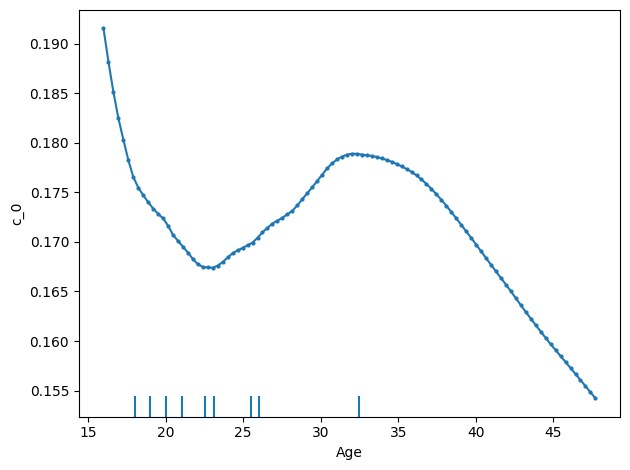

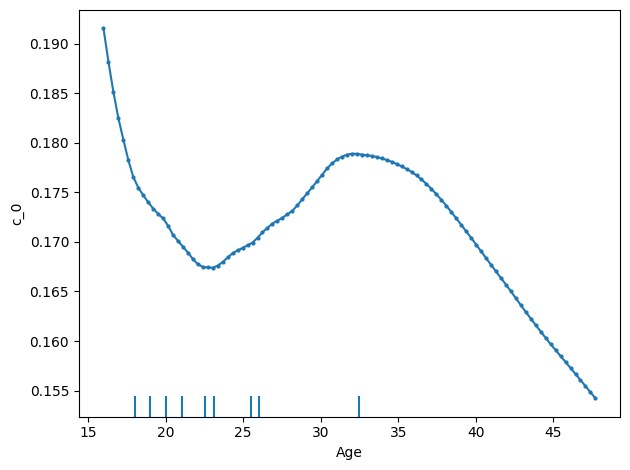

In [ ]:

# Plot PDP
plot_pd(pd_results,n_ice='all')
plt.show()
# print(help(plot_pd))
# Plot ICE
plot_pd(pd_results, n_ice=2)
plt.show()

## Only adults

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

# Define binary columns and one-hot encoding columns
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_columns = ['CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

# Binary encoding: Map 'yes'/'no' to 1/0 and 'Male'/'Female' to 1/0
data_encoded = data.copy()
binary_mappings = {'yes': True, 'no': False, 'Male': True, 'Female': False}
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map(binary_mappings)


# One-hot encode the remaining columns
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_columns, drop_first=True)

# Calculate BMI and add as a new column
data_encoded['BMI'] = data_encoded['Weight'] / (data_encoded['Height'] ** 2)

# Drop the original 'Weight' and 'Height' columns
data_encoded = data_encoded.drop(columns=['Weight', 'Height'])

# Categorize BMI
'''
classification ranges defined by health organizations such as the World Health
Organization (WHO) and the Centers for Disease Control and Prevention (CDC).

These ranges are:
Underweight: BMI < 18.5
Normal weight: 18.5 ≤ BMI < 24.9
Overweight: 25 ≤ BMI < 29.9
Obesity I: 30 ≤ BMI < 34.9
Obesity II: 35 ≤ BMI < 39.9
Obesity III: BMI ≥ 40

'''
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
data_encoded['BMI_Category'] = pd.cut(data_encoded['BMI'], bins=bmi_bins, labels=bmi_labels)

# Drop the original BMI column
data_encoded = data_encoded.drop(columns=['BMI'])



# Define the features (X) and the target (y)
data_encoded = data_encoded.drop(columns=['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                                       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                                       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'])

# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']
X.head()
# Categorize Age
data_encoded['Adult'] = data_encoded['Age'].apply(lambda x: True if x >= 18 else False)
data_encoded =  data_encoded[data_encoded['Adult']]
# Drop the original Age column

data_encoded.drop(columns=['Adult'])
# Define features and target
X = data_encoded.drop(columns=['BMI_Category'])
y = data_encoded['BMI_Category']

X.head()

Gender   Age  family_history_with_overweight   FAVC  FCVC  NCP  SMOKE  \
0   False  21.0                            True  False   2.0  3.0  False   
1   False  21.0                            True  False   3.0  3.0   True   
2    True  23.0                            True  False   2.0  3.0  False   
3    True  27.0                           False  False   3.0  3.0  False   
4    True  22.0                           False  False   2.0  1.0  False   

   CH2O    SCC  FAF  ...  CAEC_Sometimes  CAEC_no  CALC_Frequently  \
0   2.0  False  0.0  ...            True    False            False   
1   3.0   True  3.0  ...            True    False            False   
2   2.0  False  2.0  ...            True    False             True   
3   2.0  False  2.0  ...            True    False             True   
4   2.0  False  0.0  ...            True    False            False   

   CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0           False     True        False             False   
1            True    False        False             False   
2           False    False        False             False   
3           False    False        False             False   
4            True    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  Adult  
0                          True           False   True  
1                          True           False   True  
2                          True           False   True  
3                         False            True   True  
4                          True           False   True  

[5 rows x 22 columns]

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
classification_report_result

Classification Report:
                precision    recall  f1-score   support

Normal weight       0.70      0.48      0.57        63
    Obesity I       0.68      0.86      0.76        63
   Obesity II       0.85      0.74      0.79        68
  Obesity III       0.89      0.89      0.89        61
   Overweight       0.66      0.70      0.68       100
  Underweight       0.71      0.82      0.76        45

     accuracy                           0.74       400
    macro avg       0.75      0.75      0.74       400
 weighted avg       0.74      0.74      0.73       400

Accuracy: 0.7375


{'Normal weight': {'precision': 0.6976744186046512,
  'recall': 0.47619047619047616,
  'f1-score': 0.5660377358490566,
  'support': 63},
 'Obesity I': {'precision': 0.6835443037974683,
  'recall': 0.8571428571428571,
  'f1-score': 0.7605633802816901,
  'support': 63},
 'Obesity II': {'precision': 0.847457627118644,
  'recall': 0.7352941176470589,
  'f1-score': 0.7874015748031497,
  'support': 68},
 'Obesity III': {'precision': 0.8852459016393442,
  'recall': 0.8852459016393442,
  'f1-score': 0.8852459016393442,
  'support': 61},
 'Overweight': {'precision': 0.660377358490566,
  'recall': 0.7,
  'f1-score': 0.6796116504854369,
  'support': 100},
 'Underweight': {'precision': 0.7115384615384616,
  'recall': 0.8222222222222222,
  'f1-score': 0.7628865979381444,
  'support': 45},
 'accuracy': 0.7375,
 'macro avg': {'precision': 0.7476396785315226,
  'recall': 0.7460159291403263,
  'f1-score': 0.7402911401661371,
  'support': 400},
 'weighted avg': {'precision': 0.7417521619342218,
  'recal

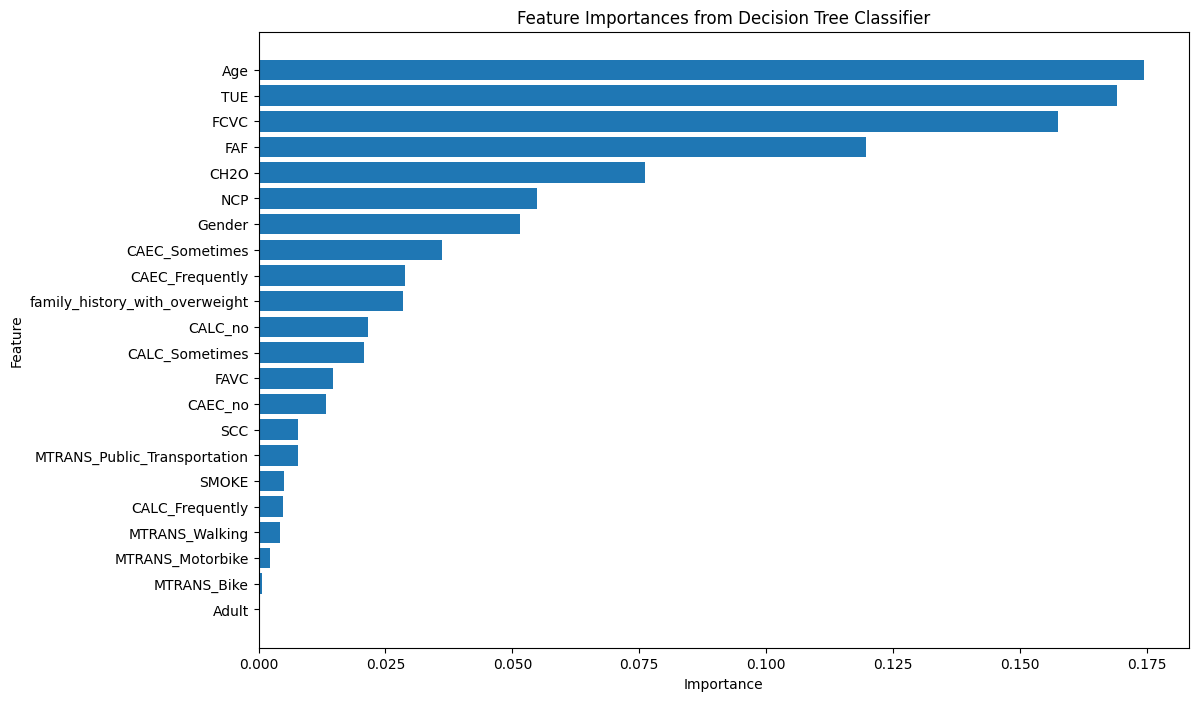

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# Extract feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()